# Part 1: London’s underground resilience: 50 marks


## I.- Topological network: 34 marks


### I.1.- Centrality Measures: 9 (3 per measure)
#### 3 centrality measures:top 10 ranks for all 3 measures

* Degree centrality
* Closeness centrality
* Betweeness centrality


#### 1 Degree centrality: 
- Degree centrality assigns an importance score based simply on the number of links held by each node.
- What it tells us: How many direct, ‘one hop’ connections each node has to other nodes in the network.
- When to use it: finding very connected stations, popular stations, stations who are likely to hold most information or who can quickly connect with the wider network: these ay include kings cross, paddington...


#### 2 Closeness centrality
- Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network.
- What it tells us: This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. 
- When to use it: For finding the stations that are most quickest (shortest distance and time) in connecting you to all other possible stations in the network 
- closeness centrality was closely related to the operational condition of a rail line in an urban rail network.
- closeness centrality is an index that represents the length of time it takes traffic to reach a node (assuming train using the more or less same duration to travel from one station to another).(To2015)

#### 3 Betweeness centrality
- Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.
- What it tells us: which nodes are ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one.
- When to use it: For finding the station that influence the flow around a system.
- betweenness centrality can be considered as an index that represents the frequency of traffic one can observe flowing through a node across multiple instances.


##### source:  https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/

- note: As the case for degree centrality, closeness centrality is dependent on the size of the network. Hence, one cannot compare values of closeness centrality from networks of different sizes.


In [585]:
# import libraries
from operator import itemgetter

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

### Constructing the network

In [8]:
# londons graph
G = nx.read_graphml("data/london.graph.xml")

In [9]:
type(G)

networkx.classes.graph.Graph

In [10]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [11]:
# Lets check node attributes
list(G.nodes(data=True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [12]:
# since coordinates are string, lets convert them to tuple using eval().
# n represents each node to be iterated over in all the nodes in the graph
for n in G.nodes():
    G.nodes[n]["coords"] = eval(G.nodes[n]["coords"])

In [13]:
# check node attribute. see its no longer a string
list(G.nodes(data=True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [14]:
# lets check edge attributes
list(G.edges(data=True))[0:2]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816, 'line_name': 'Jubilee', 'flows': 6744})]

In [15]:
# do we need to add station name to edge attribute?

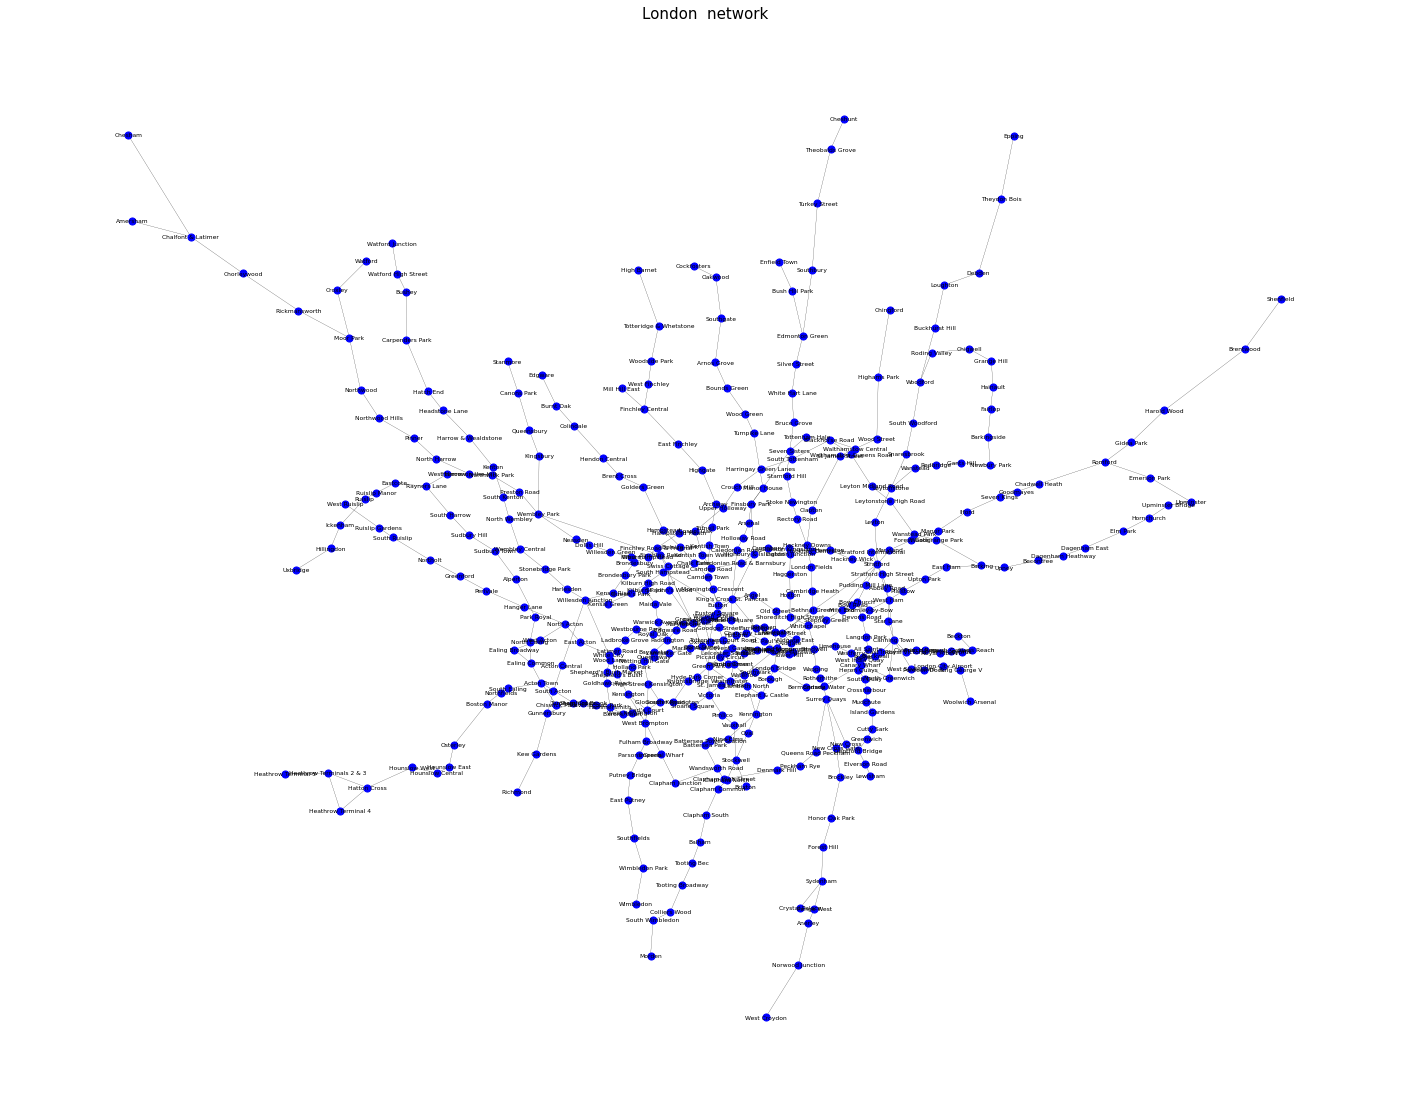

In [16]:
# Let's plot the tube network!

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.get_node_attributes(G, "coords")

nx.draw_networkx_nodes(G, pos, node_size=50, node_color="b")
nx.draw_networkx_edges(G, pos, arrows=False, width=0.2)
nx.draw_networkx_labels(G, pos, font_size=6, font_color="black")

plt.title("London  network", fontsize=15)
plt.axis("off")
plt.show()

In [17]:
# lets print the df from the shape file
df = nx.to_pandas_edgelist(G)
df.head()

source         target       length  flows     line_name
0  Wembley Park      Kingsbury  2916.771558  12356       Jubilee
1  Wembley Park        Neasden  2353.165938   6744       Jubilee
2  Wembley Park   Preston Road  1419.735166  36601  Metropolitan
3  Wembley Park  Finchley Road  7266.373927  55216  Metropolitan
4     Kingsbury     Queensbury  1245.995234   9419       Jubilee

## 1.1 A: Topological Degree centrality

In [18]:
degree_london = nx.degree_centrality(G)

# add the degree attributs to the network G and name it 'degree'
nx.set_node_attributes(G, dict(degree_london), "degree")

In [19]:
# lets check that its been added. it has
list(G.nodes(data=True))[0:2]

[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672), 'degree': 0.01}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083), 'degree': 0.005})]

In [20]:
# lets convert them to a df just for better visuals
df_degree = pd.DataFrame(index=G.nodes())
df_degree["Degree_Centrality"] = pd.Series(nx.get_node_attributes(G, "degree"))

# sort highest 10 station of degree centrality
df_sorted = df_degree.sort_values(["Degree_Centrality"], ascending=False)
df_sorted[0:10]

Degree_Centrality
Stratford                            0.0225
Bank and Monument                    0.0200
King's Cross St. Pancras             0.0175
Baker Street                         0.0175
Earl's Court                         0.0150
Oxford Circus                        0.0150
Liverpool Street                     0.0150
Waterloo                             0.0150
Green Park                           0.0150
Canning Town                         0.0150

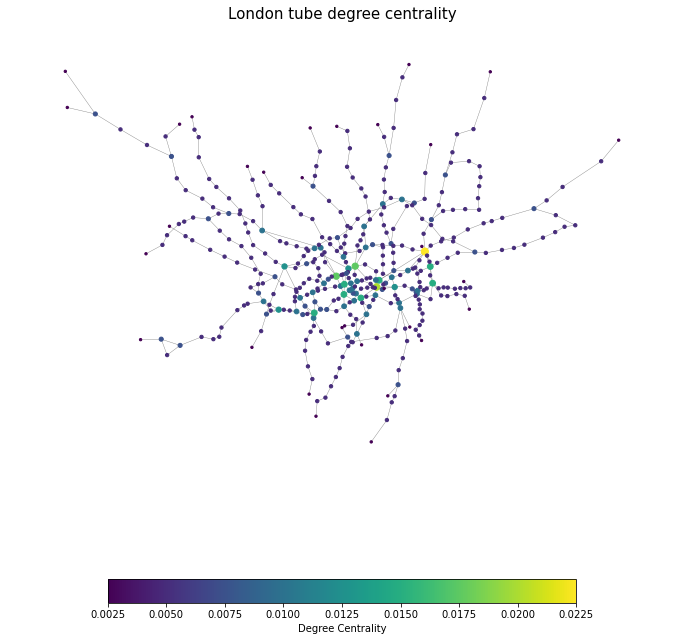

In [986]:
# Lets set colour and size of nodes according to betweenness values
degree_values = [(i[1]["degree"]) for i in G.nodes(data=True)]

deg_color = [(i[1]["degree"]) for i in G.nodes(data=True)]
deg_size = [(i[1]["degree"] / (max(degree_values))) * 50 for i in G.nodes(data=True)]


# Plot graph

pos = pos

fig, ax = plt.subplots(figsize=(12, 12))


nx.draw_networkx_edges(G, pos, edge_color="gray", width=0.4)
nod = nx.draw_networkx_nodes(G, pos=pos, node_color=deg_color, node_size=deg_size)

plt.colorbar(nod, label="Degree Centrality", orientation="horizontal", shrink=0.7)
plt.axis("off")
plt.title("London tube degree centrality", fontsize=15)
plt.show()

## 1.1 B: Topological betweeness centrality

In [22]:
between_london_t = nx.betweenness_centrality(G, normalized=False)

# add the between attributs to the network G and name it 'betweenes_t'
nx.set_node_attributes(G, dict(between_london_t), "betweeness_t")

In [23]:
# lets check that its been added. it has
list(G.nodes(data=True))[0:2]

[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672),
   'degree': 0.01,
   'betweeness_t': 10780.813492063491}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083),
   'degree': 0.005,
   'betweeness_t': 1191.0})]

In [24]:
# lets convert them to a df just for better visuals
df_betweeness_t = pd.DataFrame(index=G.nodes())
df_betweeness_t["Topological_Betweeness_Centrality"] = pd.Series(
    nx.get_node_attributes(G, "betweeness_t")
)

# sort highest 10 station of degree centrality
df_sorted = df_betweeness_t.sort_values(
    ["Topological_Betweeness_Centrality"], ascending=False
)
df_sorted[0:10]

Topological_Betweeness_Centrality
Stratford                                      23768.093434
Bank and Monument                              23181.058947
Liverpool Street                               21610.387049
King's Cross St. Pancras                       20373.521465
Waterloo                                       19464.882323
Green Park                                     17223.622114
Euston                                         16624.275469
Westminster                                    16226.155916
Baker Street                                   15287.107612
Finchley Road                                  13173.758009

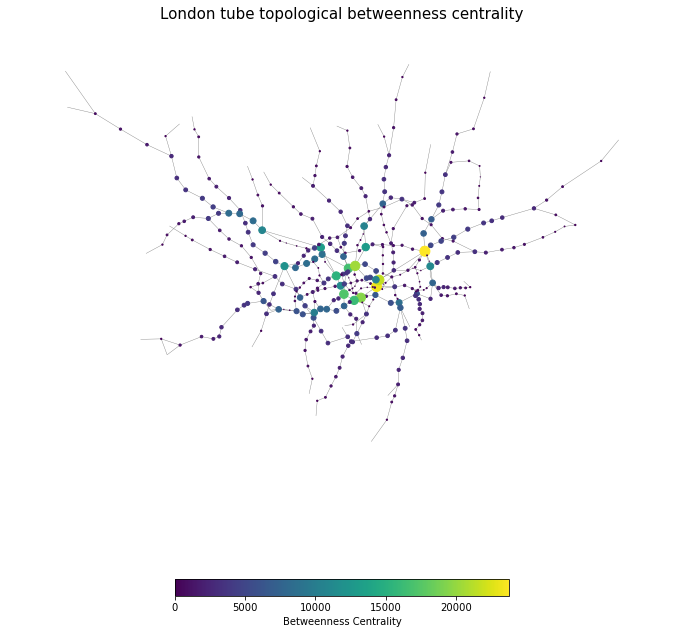

In [984]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values = [(i[1]["betweeness_t"]) for i in G.nodes(data=True)]

bet_t_color = [(i[1]["betweeness_t"]) for i in G.nodes(data=True)]
bet_t_size = [
    (i[1]["betweeness_t"] / max(betweenness_t_values)) * 100 for i in G.nodes(data=True)
]

# Plot graph
fig, ax = plt.subplots(figsize=(12, 12))

nx.draw_networkx_edges(G, pos, edge_color="gray", width=0.4)

nod = nx.draw_networkx_nodes(G, pos=pos, node_color=bet_t_color, node_size=bet_t_size)

plt.colorbar(nod, label="Betweenness Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality", fontsize=15)
plt.show()

## 1.1 C: Topological closness centrality

In [26]:
# topological closeness centrality
clos_t = nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G, clos_t, "closeness_t")

In [27]:
# lets check that its been added. it has
list(G.nodes(data=True))[0:2]

[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672),
   'degree': 0.01,
   'betweeness_t': 10780.813492063491,
   'closeness_t': 0.09465215333648841}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083),
   'degree': 0.005,
   'betweeness_t': 1191.0,
   'closeness_t': 0.08659883091578263})]

In [28]:
# lets convert them to a df just for better visuals
df_closeness_t = pd.DataFrame(index=G.nodes())
df_closeness_t["Topological_Closeness_Centrality"] = pd.Series(
    nx.get_node_attributes(G, "closeness_t")
)

# sort highest 10 station of degree centrality
df_sorted = df_closeness_t.sort_values(
    ["Topological_Closeness_Centrality"], ascending=False
)
df_sorted[0:10]

Topological_Closeness_Centrality
Green Park                                        0.114778
Bank and Monument                                 0.113572
King's Cross St. Pancras                          0.113443
Westminster                                       0.112549
Waterloo                                          0.112265
Oxford Circus                                     0.111204
Bond Street                                       0.110988
Farringdon                                        0.110742
Angel                                             0.110742
Moorgate                                          0.110314

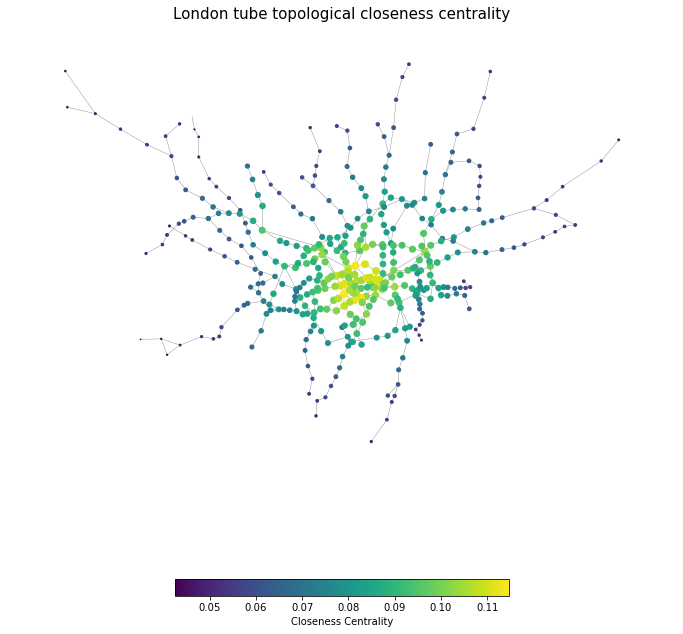

/tmp/ipykernel_5374/1107269599.py:29: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)


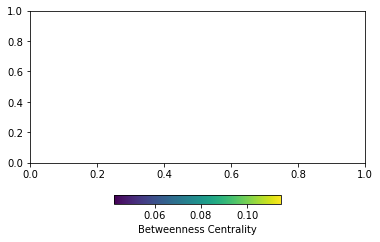

In [983]:
# Lets set color and width of nodes according to the closeness values
clos_t_val = [(i[1]["closeness_t"]) for i in G.nodes(data=True)]

closs_t_color = [(i[1]["closeness_t"]) for i in G.nodes(data=True)]
closs_t_size = [
    ((i[1]["closeness_t"] - min(clos_t_val)) / (max(clos_t_val) - min(clos_t_val)) * 50)
    for i in G.nodes(data=True)
]

# closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
# closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12, 12))

nx.draw_networkx_edges(G, pos, edge_color="gray", width=0.4)

nod = nx.draw_networkx_nodes(
    G, pos=pos, node_color=closs_t_color, node_size=closs_t_size
)

plt.colorbar(nod, label="Closeness Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality", fontsize=15)
plt.show()


# nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod, label="Betweenness Centrality", orientation="horizontal", shrink=0.5)

## I.2. Measure(s) to assess impact: 10 (5 per measure)


These Could be:
- number componenets
- degree distribution: or average degree: higher degree distribution means higher relience: higher deree in moncenteic city high in or high out...
- average shortest path: week 9
- clustering coefficient
- diameter 
- average degree 


measure that captures the properties of the. assess resilience by removing nodes and see if this disrupts the network,,do we need to take diff routes when the components increase..less connected?
why are these nodes important, what happens when they r removed, how performance changes.


reason why sequential is more accurate method to measure impact of node removal. once u remove your important nodes, when u look at ur underg and eval you imp nodes,once u remove them the whole system changes so therefore its not enough to or same to consider which nodes are important and rank them (non seq)..here we ranked before the removal exerciseand we removed based on the original ranking. in part be we remove them and reval the rank of the nodes 

## I.3.- Node removal (Analysis): 20

## 1.3 A Non Sequential removal
-  remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10th most important one. After each removal, evaluate the impact of the removal using your two measures and proceed until you have removed at least 10 nodes.


In [1241]:
G2d = G.copy()
G2b = G.copy()
G2c = G.copy()
G2_list = [G2d, G2b, G2c]

# we see that for all the 3 copies, we have 401 nodes.
for g in G2_list:
    print(len(list(g.nodes)))

# lets also check the original connected components
G2_list = [G2d, G2b, G2c]
for g in G2_list:
    print(nx.number_connected_components(g))

# lets check the original diameters
G2_list = [G2d, G2b, G2c]
for g in G2_list:
    print(nx.diameter(g))

401
401
401
1
1
1
36
36
36


In [1231]:
## To check node attributes:
list(G2b.nodes(data=True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'degree': 0.01,
  'betweeness_t': 10780.813492063491,
  'closeness_t': 0.09465215333648841})

In [377]:
print(nx.info(G2b))

Graph with 401 nodes and 467 edges


In [1234]:
avg_clus = nx.average_clustering(G2b)
avg_clus

0.030382377389858693

### Non-seq removal: Degree centrality

In [717]:
# empty lists (to create the dataframe later)
Sh_path_list = []
No_components_list = []
global_efficiency_list = []
largest_comp_size_list = []
avg_clust_list = []
station_removed = []


for j in range(0, 10):
    # extract the degree values from each of prev calcluated degrees, pick the max
    degree_values = [(i[1]["degree"]) for i in G2d.nodes(data=True)]
    maxdeg = [n for n in G2d.nodes() if G2d.nodes[n]["degree"] == max(degree_values)]
    print(maxdeg)
    # append to list of stations removed
    station_removed.append(maxdeg[0])

    # remove the max node. if they are the same max, just pick the first index max
    G2d.remove_nodes_from([maxdeg[0]])
    # number of nodes after the removal
    print(len(list(G2d.nodes)))

    # calculate no of components
    No_components = nx.number_connected_components(G2d)
    # append to list
    No_components_list.append(No_components)
    print(f"Number of components {No_components}")

    ########################################################################
    # list of all the components generated
    components = nx.connected_components(G2d)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    largest_subgraph = G2d.subgraph(largest_component)

    # get no of nodes in largest subgraph
    number_of_nodes = largest_subgraph.number_of_nodes()

    largest_comp_size_list.append(number_of_nodes)

    print(f"size_larges_comp {number_of_nodes}")

    ########################################################################

    # average_shortest_path_length for the largest component
    Sh_path = nx.average_shortest_path_length(largest_subgraph)
    Sh_path_list.append(Sh_path)
    print(f"Average shortest path in largest component is {Sh_path}")

    global_efficiency = nx.global_efficiency(largest_subgraph)
    global_efficiency_list.append(global_efficiency)
    print(f"global_efficiency {global_efficiency}")

['Stratford']
400
Number of components 3
size_larges_comp 379
Average shortest path in largest component is 14.496447069006436
global_efficiency 0.09821532049052387
['Bank and Monument']
399
Number of components 3
size_larges_comp 378
Average shortest path in largest component is 14.872496596634528
global_efficiency 0.09483329368485785
['Baker Street', "King's Cross St. Pancras"]
398
Number of components 3
size_larges_comp 377
Average shortest path in largest component is 15.686438286585021
global_efficiency 0.09058823946750871
["King's Cross St. Pancras"]
397
Number of components 4
size_larges_comp 374
Average shortest path in largest component is 17.013376152313228
global_efficiency 0.08443121130034253
['West Ham', 'Canning Town', 'Waterloo', 'Green Park', 'Oxford Circus', 'Liverpool Street', "Earl's Court"]
396
Number of components 5
size_larges_comp 371
Average shortest path in largest component is 17.853835506665696
global_efficiency 0.08230116997336108
['Canning Town', 'Waterloo'

In [718]:
station_removed

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'West Ham',
 'Canning Town',
 'Waterloo',
 'Green Park',
 'Oxford Circus',
 'Liverpool Street']

In [719]:
# create dataframe as a summary
df_deg_nonseq = pd.DataFrame(
    list(
        zip(
            station_removed,
            No_components_list,
            Sh_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station_removed (non seq)",
        "No.of Components (non seq)",
        "Average Shortest Path (non seq)",
        "Global efficiency (non seq)",
        "Size of largest component (non seq)",
    ],
)
# title
# df_deg_nonseq = df_deg_nonseq.style.set_caption ('Non-sequential Removal for Degree Centrality')

df_deg_nonseq

Station_removed (non seq)  No.of Components (non seq)  \
0                 Stratford                           3   
1         Bank and Monument                           3   
2              Baker Street                           3   
3  King's Cross St. Pancras                           4   
4                  West Ham                           5   
5              Canning Town                           8   
6                  Waterloo                           8   
7                Green Park                           8   
8             Oxford Circus                           9   
9          Liverpool Street                          10   

   Average Shortest Path (non seq)  Global efficiency (non seq)  \
0                        14.496447                     0.098215   
1                        14.872497                     0.094833   
2                        15.686438                     0.090588   
3                        17.013376                     0.084431   
4                        17.853836                     0.082301   
5                        17.693353                     0.083584   
6                        18.139508                     0.081510   
7                        18.344521                     0.080318   
8                        18.419160                     0.079749   
9                        18.404775                     0.079930   

   Size of largest component (non seq)  
0                                  379  
1                                  378  
2                                  377  
3                                  374  
4                                  371  
5                                  356  
6                                  355  
7                                  354  
8                                  352  
9                                  346

### Non-seq removal: Betweenes centrality

In [1238]:
# empty lists (to create the dataframe later)
Sh_path_list = []
No_components_list = []
global_efficiency_list = []
largest_comp_size_list = []
avg_clust_list = []
station_removed = []


for j in range(0, 10):
    # extract the degree values from each of prev calcluated degrees, pick the max
    betweeness_values = [(i[1]["betweeness_t"]) for i in G2b.nodes(data=True)]
    maxdeg = [
        n for n in G2b.nodes() if G2b.nodes[n]["betweeness_t"] == max(betweeness_values)
    ]
    print(maxdeg)
    # append to list of stations removed
    station_removed.append(maxdeg[0])

    # remove the max node. if they are the same max, just pick the first index max
    G2b.remove_nodes_from([maxdeg[0]])
    # number of nodes after the removal
    print(len(list(G2b.nodes)))

    # calculate no of components
    No_components = nx.number_connected_components(G2b)
    # append to list
    No_components_list.append(No_components)
    print(f"Number of components {No_components}")

    # list of all the components generated
    components = nx.connected_components(G2b)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    largest_subgraph = G2b.subgraph(largest_component)

    # get no of nodes in largest subgraph
    number_of_nodes = largest_subgraph.number_of_nodes()

    largest_comp_size_list.append(number_of_nodes)

    # average_shortest_path_length for the largest component
    Sh_path = nx.average_shortest_path_length(largest_subgraph)
    Sh_path_list.append(Sh_path)
    print(f"Average shortest path in largest component is {Sh_path}")

    global_efficiency = nx.global_efficiency(largest_subgraph)
    global_efficiency_list.append(global_efficiency)
    print(f"global_efficiency {global_efficiency}")

    avg_clus = nx.average_clustering(G2b)

    avg_clust_list.append(avg_clus)
    print(f"clust coef {avg_clus}")

['Stratford']
400
Number of components 3
Average shortest path in largest component is 14.496447069006436
global_efficiency 0.09821532049052387
clust coef 0.030625000000000003
['Bank and Monument']
399
Number of components 3
Average shortest path in largest component is 14.872496596634528
global_efficiency 0.09483329368485785
clust coef 0.030027449576321755
['Liverpool Street']
398
Number of components 3
Average shortest path in largest component is 15.03120943619843
global_efficiency 0.09385443664899339
clust coef 0.030102895429528594
["King's Cross St. Pancras"]
397
Number of components 4
Average shortest path in largest component is 16.030742332629124
global_efficiency 0.0889288855138365
clust coef 0.03034664747511095
['Waterloo']
396
Number of components 4
Average shortest path in largest component is 16.75674210796162
global_efficiency 0.08602774747315187
clust coef 0.02932900432900433
['Green Park']
395
Number of components 4
Average shortest path in largest component is 17.18086

In [1236]:
station_removed

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [727]:
# create dataframe as a summary
df_bet_nonseq = pd.DataFrame(
    list(
        zip(
            station_removed,
            No_components_list,
            Sh_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station Removed (non seq)",
        "No.of Components (non seq)",
        "Avg. Shortest Path (non seq)",
        "Global efficiency (non seq)",
        "Size of largest component (non seq)",
    ],
)
# title
# df_bet_nonseq = df_bet_nonseq.style.set_caption ('Non-sequential Removal for Betweeness Centrality')
df_bet_nonseq

# add size of largest component?

Station Removed (non seq)  No.of Components (non seq)  \
0                 Stratford                           3   
1         Bank and Monument                           3   
2          Liverpool Street                           3   
3  King's Cross St. Pancras                           4   
4                  Waterloo                           4   
5                Green Park                           4   
6                    Euston                           5   
7               Westminster                           5   
8              Baker Street                           6   
9             Finchley Road                           7   

   Avg. Shortest Path (non seq)  Global efficiency (non seq)  \
0                     14.496447                     0.098215   
1                     14.872497                     0.094833   
2                     15.031209                     0.093854   
3                     16.030742                     0.088929   
4                     16.756742                     0.086028   
5                     17.180865                     0.084001   
6                     16.807372                     0.086321   
7                     16.975059                     0.085663   
8                     17.586339                     0.082813   
9                     17.986979                     0.081751   

   Size of largest component (non seq)  
0                                  379  
1                                  378  
2                                  377  
3                                  371  
4                                  370  
5                                  369  
6                                  346  
7                                  345  
8                                  342  
9                                  339

### Non-seq removal: closeness centrality

In [1005]:
# empty lists (to create the dataframe later)
Sh_path_list = []
No_components_list = []
station_removed = []
global_efficiency_list = []
largest_comp_size_list = []


for j in range(0, 10):
    # extract the degree values from each of prev calcluated degrees, pick the max
    closeness_values = [(i[1]["closeness_t"]) for i in G2c.nodes(data=True)]
    maxdeg = [
        n for n in G2c.nodes() if G2c.nodes[n]["closeness_t"] == max(closeness_values)
    ]
    print(maxdeg)
    # append to list of stations removed
    station_removed.append(maxdeg[0])

    # remove the max node. if they are the same max, just pick the first index max
    G2c.remove_nodes_from([maxdeg[0]])
    # number of nodes after the removal
    print(len(list(G2c.nodes)))

    # calculate no of components
    No_components = nx.number_connected_components(G2c)
    # append to list
    No_components_list.append(No_components)
    print(f"Number of components {No_components}")

    # list of all the components generated
    components = nx.connected_components(G2c)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    largest_subgraph = G2c.subgraph(largest_component)

    # get no of nodes in largest subgraph
    number_of_nodes = largest_subgraph.number_of_nodes()
    largest_comp_size_list.append(number_of_nodes)

    # average_shortest_path_length for the largest component
    Sh_path = nx.average_shortest_path_length(largest_subgraph)
    Sh_path_list.append(Sh_path)
    print(f"Average shortest path in largest component is {Sh_path}")

    global_efficiency = nx.global_efficiency(largest_subgraph)
    global_efficiency_list.append(global_efficiency)
    print(f"global_efficiency {global_efficiency}")

['Green Park']
400
Number of components 1
Average shortest path in largest component is 13.82453634085213
global_efficiency 0.09918991960788402
['Bank and Monument']
399
Number of components 1
Average shortest path in largest component is 14.382728177226987
global_efficiency 0.09487232544791133
["King's Cross St. Pancras"]
398
Number of components 1
Average shortest path in largest component is 15.98377276812273
global_efficiency 0.08793385149140875
['Westminster']
397
Number of components 1
Average shortest path in largest component is 16.080248327099714
global_efficiency 0.08737164566976727
['Waterloo']
396
Number of components 1
Average shortest path in largest component is 16.855721774709117
global_efficiency 0.08485943799789313
['Oxford Circus']
395
Number of components 1
Average shortest path in largest component is 17.43183190901497
global_efficiency 0.08278135073141742
['Bond Street']
394
Number of components 1
Average shortest path in largest component is 17.464266800997144
gl

In [412]:
global_efficiency_list

[0.09918991960788402,
 0.09487232544791133,
 0.08793385149140875,
 0.08737164566976727,
 0.08485943799789313,
 0.08278135073141742,
 0.08258086417012774,
 0.08260040537396239,
 0.08262233108950982,
 0.08251295445582942]

In [1006]:
# create dataframe as a summary
df_clo_nonseq = pd.DataFrame(
    list(
        zip(
            station_removed,
            No_components_list,
            Sh_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station Removed (non seq)",
        "No.of Components (non seq)",
        "Avg. Shortest Path (non seq)",
        "Global efficiency (non seq)",
        "Size of largest component (non seq)",
    ],
)
# title
# df_clo_nonseq = df_clo_nonseq.style.set_caption ('Non-sequential Removal for Closeness Centrality')


df_clo_nonseq

Station Removed (non seq)  No.of Components (non seq)  \
0                Green Park                           1   
1         Bank and Monument                           1   
2  King's Cross St. Pancras                           1   
3               Westminster                           1   
4                  Waterloo                           1   
5             Oxford Circus                           1   
6               Bond Street                           1   
7                Farringdon                           1   
8                     Angel                           1   
9                  Moorgate                           3   

   Avg. Shortest Path (non seq)  Global efficiency (non seq)  \
0                     13.824536                     0.099190   
1                     14.382728                     0.094872   
2                     15.983773                     0.087934   
3                     16.080248                     0.087372   
4                     16.855722                     0.084859   
5                     17.431832                     0.082781   
6                     17.464267                     0.082581   
7                     17.462494                     0.082600   
8                     17.460528                     0.082622   
9                     17.473922                     0.082513   

   Size of largest component (non seq)  
0                                  400  
1                                  399  
2                                  398  
3                                  397  
4                                  396  
5                                  395  
6                                  394  
7                                  393  
8                                  392  
9                                  389

## 1.3 B Sequential removal

### Seq removal Deg Centrality

In [1239]:
G3d = G.copy()
G3b = G.copy()
G3c = G.copy()
G3_list = [G3d, G3b, G3c]

# we see that for all the 3 copies, we have 401 nodes.
for g in G3_list:
    print(len(list(g.nodes)))

# lets also check the original connected components
G3_list = [G3d, G3b, G3c]
for g in G3_list:
    print(nx.number_connected_components(g))

# lets check the original diameters
G3_list = [G3d, G3b, G3c]
for g in G3_list:
    print(nx.diameter(g))

401
401
401
1
1
1
36
36
36


In [612]:
# empty lists
Sh_path_list = []
No_components_list = []

global_efficiency_list = []
station_removed = []
largest_comp_size_list = []

for j in range(0, 10):

    # extract the degree values from each of prev calcluated degrees, pick the max
    degree_values = [(i[1]["degree"]) for i in G3d.nodes(data=True)]
    maxdeg = [n for n in G3d.nodes() if G3d.nodes[n]["degree"] == max(degree_values)]
    print(maxdeg)
    # append to list of stations removed
    station_removed.append(maxdeg[0])

    # remove node:
    G3d.remove_nodes_from([maxdeg[0]])
    # number of nodes after the removal
    print(len(list(G3d.nodes)))

    # recalculate the degree centrality using networkx function:
    degree_cen_new = nx.degree_centrality(G3d)
    nx.set_node_attributes(G3d, dict(degree_cen_new), "degree")

    # calculate no of components
    No_components = nx.number_connected_components(G3d)
    # append to list
    No_components_list.append(No_components)

    components = nx.connected_components(G3d)
    print(f"Number of components {No_components}")
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    largest_subgraph = G3d.subgraph(largest_component)

    # get no of nodes in largest subgraph
    number_of_nodes = largest_subgraph.number_of_nodes()
    largest_comp_size_list.append(number_of_nodes)

    # average_shortest_path_length for the largest component
    Sh_path = nx.average_shortest_path_length(largest_subgraph)
    Sh_path_list.append(Sh_path)
    print(f"Average shortest path in largest component is {Sh_path}")

    global_efficiency = nx.global_efficiency(largest_subgraph)
    global_efficiency_list.append(global_efficiency)
    print(f"global_efficiency {global_efficiency}")

['Stratford']
400
Number of components 3
Average shortest path in largest component is 14.496447069006436
global_efficiency 0.09821532049052387
['Bank and Monument']
399
Number of components 3
Average shortest path in largest component is 14.872496596634528
global_efficiency 0.09483329368485785
['Baker Street', "King's Cross St. Pancras"]
398
Number of components 3
Average shortest path in largest component is 15.686438286585021
global_efficiency 0.09058823946750871
["King's Cross St. Pancras"]
397
Number of components 4
Average shortest path in largest component is 17.013376152313228
global_efficiency 0.08443121130034253
['Canning Town', 'Green Park', 'Oxford Circus', "Earl's Court"]
396
Number of components 6
Average shortest path in largest component is 17.37607551841535
global_efficiency 0.0839393711610646
['Green Park', 'Oxford Circus', "Earl's Court"]
395
Number of components 6
Average shortest path in largest component is 17.531099733897697
global_efficiency 0.08277245634291526


In [613]:
station_removed

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'Canning Town',
 'Green Park',
 "Earl's Court",
 'Waterloo',
 'Oxford Circus',
 'Willesden Junction']

In [614]:
df_cent_seq = pd.DataFrame(
    list(
        zip(
            station_removed,
            No_components_list,
            Sh_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station Removed (seq)",
        "No. of Components (seq)",
        "Avg. Shortest Path (seq)",
        "Global efficiency (seq)",
        "Size of largest component (seq)",
    ],
)

# title
# df_cent_seq = df_cent_seq.style.set_caption ('Sequential Removal for Degree Centrality')

df_cent_seq

Station Removed (seq)  No. of Components (seq)  \
0                 Stratford                        3   
1         Bank and Monument                        3   
2              Baker Street                        3   
3  King's Cross St. Pancras                        4   
4              Canning Town                        6   
5                Green Park                        6   
6              Earl's Court                        6   
7                  Waterloo                        6   
8             Oxford Circus                        7   
9        Willesden Junction                        8   

   Avg. Shortest Path (seq)  Global efficiency (seq)  \
0                 14.496447                 0.098215   
1                 14.872497                 0.094833   
2                 15.686438                 0.090588   
3                 17.013376                 0.084431   
4                 17.376076                 0.083939   
5                 17.531100                 0.082772   
6                 17.894731                 0.080833   
7                 18.493501                 0.078642   
8                 18.574966                 0.078064   
9                 21.207349                 0.072742   

   Size of largest component (seq)  
0                              379  
1                              378  
2                              377  
3                              374  
4                              360  
5                              359  
6                              358  
7                              357  
8                              355  
9                              341

### Seq removal Betweeness Centrality

In [1240]:
# empty lists
Sh_path_list = []
No_components_list = []
station_removed = []
global_efficiency_list = []
largest_comp_size_list = []
avg_clust_list = []


for j in range(0, 10):

    # extract the degree values from each of prev calcluated degrees, pick the max
    bet_values = [(i[1]["betweeness_t"]) for i in G3b.nodes(data=True)]
    maxdeg = [n for n in G3b.nodes() if G3b.nodes[n]["betweeness_t"] == max(bet_values)]
    print(maxdeg)
    # append to list of stations removed
    station_removed.append(maxdeg[0])

    # remove node:
    G3b.remove_nodes_from([maxdeg[0]])
    # number of nodes after the removal
    print(len(list(G3b.nodes)))

    # recalculate the degree centrality using networkx function:
    bet_cen_new = nx.betweenness_centrality(G3b)
    nx.set_node_attributes(G3b, dict(bet_cen_new), "betweeness_t")

    # calculate no of components
    No_components = nx.number_connected_components(G3b)
    # append to list
    No_components_list.append(No_components)

    components = nx.connected_components(G3b)
    print(f"Number of components {No_components}")
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    largest_subgraph = G3b.subgraph(largest_component)

    # get no of nodes in largest subgraph
    number_of_nodes = largest_subgraph.number_of_nodes()
    largest_comp_size_list.append(number_of_nodes)

    # average_shortest_path_length for the largest component
    Sh_path = nx.average_shortest_path_length(largest_subgraph)
    Sh_path_list.append(Sh_path)
    print(f"Average shortest path in largest component is {Sh_path}")

    global_efficiency = nx.global_efficiency(largest_subgraph)
    global_efficiency_list.append(global_efficiency)
    print(f"global_efficiency {global_efficiency}")

    avg_clus = nx.average_clustering(G3b)

    avg_clust_list.append(avg_clus)
    print(f"clust coef {avg_clus}")

['Stratford']
400
Number of components 3
Average shortest path in largest component is 14.496447069006436
global_efficiency 0.09821532049052387
clust coef 0.030625000000000003
["King's Cross St. Pancras"]
399
Number of components 3
Average shortest path in largest component is 15.31013431013431
global_efficiency 0.0934306428076182
clust coef 0.030868838763575608
['Waterloo']
398
Number of components 3
Average shortest path in largest component is 15.795939387098596
global_efficiency 0.09036047432050572
clust coef 0.02997128499641063
['Bank and Monument']
397
Number of components 3
Average shortest path in largest component is 16.789631205673757
global_efficiency 0.08575331435591853
clust coef 0.02925512774379273
['Canada Water']
396
Number of components 3
Average shortest path in largest component is 19.02923351158645
global_efficiency 0.08036896424477781
clust coef 0.02932900432900433
['West Hampstead']
395
Number of components 4
Average shortest path in largest component is 13.462360

In [730]:
df_bet_seq = pd.DataFrame(
    list(
        zip(
            station_removed,
            No_components_list,
            Sh_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station Removed (seq)",
        "No. of Components (seq)",
        "Avg. Shortest Path (seq)",
        "Global efficiency (seq)",
        "Size of largest component (seq)",
    ],
)

# title
# df_bet_seq = df_bet_seq.style.set_caption ('Sequential Removal for Betweeness Centrality')
df_bet_seq

Station Removed (seq)  No. of Components (seq)  \
0                 Stratford                        3   
1  King's Cross St. Pancras                        3   
2                  Waterloo                        3   
3         Bank and Monument                        3   
4              Canada Water                        3   
5            West Hampstead                        4   
6              Earl's Court                        4   
7           Shepherd's Bush                        5   
8                    Euston                        6   
9              Baker Street                        7   

   Avg. Shortest Path (seq)  Global efficiency (seq)  \
0                 14.496447                 0.098215   
1                 15.310134                 0.093431   
2                 15.795939                 0.090360   
3                 16.789631                 0.085753   
4                 19.029234                 0.080369   
5                 13.462360                 0.108644   
6                 14.206450                 0.104054   
7                 13.792046                 0.109139   
8                 13.821885                 0.113125   
9                 18.193596                 0.097561   

   Size of largest component (seq)  
0                              379  
1                              378  
2                              377  
3                              376  
4                              375  
5                              227  
6                              226  
7                              196  
8                              173  
9                              170

### Seq removal closeness Centrality

In [1200]:
# empty lists
Sh_path_list = []
No_components_list = []
station_removed = []
global_efficiency_list = []
largest_comp_size_list = []

for j in range(0, 10):

    # extract the degree values from each of prev calcluated degrees, pick the max
    close_values = [(i[1]["closeness_t"]) for i in G3c.nodes(data=True)]
    maxdeg = [
        n for n in G3c.nodes() if G3c.nodes[n]["closeness_t"] == max(close_values)
    ]
    print(maxdeg)
    # append to list of stations removed
    station_removed.append(maxdeg[0])

    # remove node:
    G3c.remove_nodes_from([maxdeg[0]])
    # number of nodes after the removal
    print(len(list(G3c.nodes)))

    # recalculate the degree centrality using networkx function:
    close_cen_new = nx.closeness_centrality(G3c)
    nx.set_node_attributes(G3c, dict(close_cen_new), "closeness_t")

    # calculate no of components
    No_components = nx.number_connected_components(G3c)
    # append to list
    No_components_list.append(No_components)

    components = nx.connected_components(G3c)
    print(f"Number of components {No_components}")
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    largest_subgraph = G3c.subgraph(largest_component)

    # get no of nodes in largest subgraph
    number_of_nodes = largest_subgraph.number_of_nodes()
    largest_comp_size_list.append(number_of_nodes)

    # average_shortest_path_length for the largest component
    Sh_path = nx.average_shortest_path_length(largest_subgraph)
    Sh_path_list.append(Sh_path)
    print(f"Average shortest path in largest component is {Sh_path}")

    global_efficiency = nx.global_efficiency(largest_subgraph)
    global_efficiency_list.append(global_efficiency)
    print(f"global_efficiency {global_efficiency}")

['Green Park']
400
Number of components 1
Average shortest path in largest component is 13.82453634085213
global_efficiency 0.09918991960788402
["King's Cross St. Pancras"]
399
Number of components 1
Average shortest path in largest component is 14.65848037178373
global_efficiency 0.09443475025566316
['Waterloo']
398
Number of components 1
Average shortest path in largest component is 15.114818424616786
global_efficiency 0.09181648060183005
['Bank and Monument']
397
Number of components 1
Average shortest path in largest component is 16.70242729562629
global_efficiency 0.08542563066911478
['West Hampstead']
396
Number of components 1
Average shortest path in largest component is 18.974696330392533
global_efficiency 0.08054424756502003
['Canada Water']
395
Number of components 2
Average shortest path in largest component is 13.978013765978368
global_efficiency 0.10474587513120245
['Stratford']
394
Number of components 4
Average shortest path in largest component is 13.978013765978368
gl

In [1201]:
df_close_seq = pd.DataFrame(
    list(
        zip(
            station_removed,
            No_components_list,
            Sh_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station Removed (seq)",
        "No. of Components (seq)",
        "Avg. Shortest Path (seq)",
        "Global efficiency (seq)",
        "Size of largest component (seq)",
    ],
)
# title
# df_close_seq = df_close_seq.style.set_caption ('Sequential Removal for Closeness Centrality')

# start from 1
# df_close_seq.index = np.arange(1, len(df_close_seq) + 1)

# reset index
# df_close_seq.set_index(['Station Removed (seq)'])

df_close_seq

Station Removed (seq)  No. of Components (seq)  \
0                Green Park                        1   
1  King's Cross St. Pancras                        1   
2                  Waterloo                        1   
3         Bank and Monument                        1   
4            West Hampstead                        1   
5              Canada Water                        2   
6                 Stratford                        4   
7              Earl's Court                        4   
8           Shepherd's Bush                        5   
9             Oxford Circus                        5   

   Avg. Shortest Path (seq)  Global efficiency (seq)  \
0                 13.824536                 0.099190   
1                 14.658480                 0.094435   
2                 15.114818                 0.091816   
3                 16.702427                 0.085426   
4                 18.974696                 0.080544   
5                 13.978014                 0.104746   
6                 13.978014                 0.104746   
7                 14.729722                 0.100184   
8                 14.747608                 0.103441   
9                 15.661877                 0.097733   

   Size of largest component (seq)  
0                              400  
1                              399  
2                              398  
3                              397  
4                              396  
5                              226  
6                              226  
7                              225  
8                              195  
9                              194

## Lets join seq and non seq graphs to compare

### plot closeness

In [1202]:
# df_closeness_all = df_close_seq.join(df_clo_nonseq),index=True
df_closeness_all = pd.merge(
    df_clo_nonseq, df_close_seq, left_index=True, right_index=True
)


df_closeness_all.index = np.arange(1, len(df_closeness_all) + 1)

df_closeness_all

df_closeness_all.drop(
    columns=[
        "No. of Components (seq)",
        "Global efficiency (seq)",
        "No.of Components (non seq)",
        "Global efficiency (non seq)",
    ],
    inplace=True,
)

df_closeness_all


# df_bet_all = pd.merge(df_bet_seq, df_bet_nonseq, left_index=True, right_index=True)

# df_bet_all.index = np.arange(1, len(df_bet_all) + 1)
# df_bet_all

# df_bet_all.drop(columns =["No. of Components (seq)","Avg. Shortest Path (seq)", "No.of Components (non seq)","Avg. Shortest Path (non seq)"],inplace=True)
# df_bet_all

Station Removed (non seq)  Avg. Shortest Path (non seq)  \
1                 Green Park                     13.824536   
2          Bank and Monument                     14.382728   
3   King's Cross St. Pancras                     15.983773   
4                Westminster                     16.080248   
5                   Waterloo                     16.855722   
6              Oxford Circus                     17.431832   
7                Bond Street                     17.464267   
8                 Farringdon                     17.462494   
9                      Angel                     17.460528   
10                  Moorgate                     17.473922   

    Size of largest component (non seq)     Station Removed (seq)  \
1                                   400                Green Park   
2                                   399  King's Cross St. Pancras   
3                                   398                  Waterloo   
4                                   397         Bank and Monument   
5                                   396            West Hampstead   
6                                   395              Canada Water   
7                                   394                 Stratford   
8                                   393              Earl's Court   
9                                   392           Shepherd's Bush   
10                                  389             Oxford Circus   

    Avg. Shortest Path (seq)  Size of largest component (seq)  
1                  13.824536                              400  
2                  14.658480                              399  
3                  15.114818                              398  
4                  16.702427                              397  
5                  18.974696                              396  
6                  13.978014                              226  
7                  13.978014                              226  
8                  14.729722                              225  
9                  14.747608                              195  
10                 15.661877                              194

In [620]:
# #df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()

# fig, ax = plt.subplots(figsize = (9,6))
# fig.suptitle("Connected Components after Removal of 10 Stations", fontsize=15)
# df_closeness_all.plot(ax =ax, y=["No. of Components (seq)","No.of Components (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':13}
# font2 = {'family':'serif','color':'black','size':12}

# #plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.title("Using 2 methods of removal for Closeness Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed",  fontdict = font2)
# plt.ylabel("Number of components", fontdict = font2)

# #plot the results on London

# #cluster_mapping_shape_file.plot(column = "Cluster", categorical = True, legend=True, ax=ax)
# #ax.set_axis_off()

# plt.xticks(list(df_closeness_all.index))

# plt.show()

# #############
# # fig, ax = plt.subplots(1,1,figsize=(12,5))
# # fig.suptitle("Scenario A: Change in Station In Flows after Brexit (Apart from Canary Wharf)") #Decrease in Canary Wharf's jobs


# # # stations = diff_sb2["station_origin"]
# # # change_flows = diff_sb2["diff"]
# # ax.plot(list(diff_sa['diff'])[1:], color = "blue", label = 'Change in In Flows')
# # ax.plot([0]*30, color = "red", linestyle='--',linewidth=1.5 )

# # ax.grid(color='grey', linestyle='--',alpha=0.3)
# # ax.set_xlabel("Affected Stations")
# # ax.set_ylabel("Change in In Flows")
# # #ax1.set_ylim(-200,200) #！！！！！！！！！！！！！！！！！
# # ax.set_xticks(list(range(30)))
# # ax.set_xticklabels(list(diff_sa['station_origin'])[0:30], rotation=90)
# # ax.legend(loc=1)
# # ax.set_title('Top 30 Changes in In Flows')

In [621]:
# #df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()

# fig, ax = plt.subplots(figsize = (9,6))
# fig.suptitle("Avg. shortest path after Removal of 10 Stations", fontsize=15)
# df_closeness_all.plot(ax =ax, y=["Avg. Shortest Path (seq)","Avg. Shortest Path (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':13}
# font2 = {'family':'serif','color':'black','size':12}

# plt.title("Using 2 methods for removal for Closeness Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed", fontdict = font2)
# plt.ylabel("Avg. Shortest Path ", fontdict = font2)

# plt.xticks(list(df_closeness_all.index))

# plt.show()

In [622]:
# #df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()

# fig, ax = plt.subplots(figsize = (9,6))
# fig.suptitle("Global Efficiency after Removal of 10 Stations", fontsize=15)
# df_closeness_all.plot(ax =ax, y=["Global efficiency (seq)","Global efficiency (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':13}
# font2 = {'family':'serif','color':'black','size':12}

# plt.title("Using 2 methods for removal for Closeness Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed", fontdict = font2)
# plt.ylabel("Number of components", fontdict = font2)

# plt.xticks(list(df_closeness_all.index))

# plt.show()

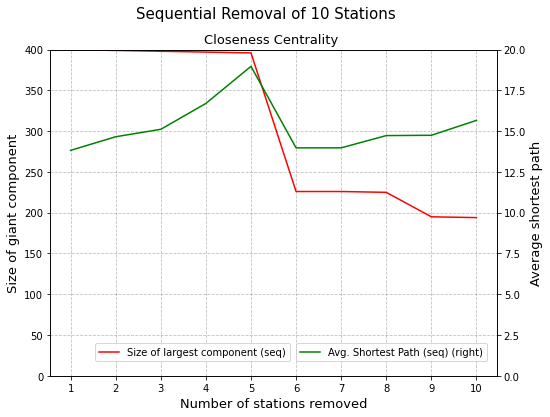

In [1220]:
# title
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Sequential Removal of 10 Stations", fontsize=15)

# x label
plt.xlabel("Number of stations removed", fontsize=13)

# plot
ax = df_closeness_all["Size of largest component (seq)"].plot(
    ylim=(0, 400), color="red"
)
ax2 = df_closeness_all["Avg. Shortest Path (seq)"].plot(
    secondary_y=True, ax=ax, color="green"
)

ax2.set_ylim(0, 20)

# legend and grid
ax2.legend(bbox_to_anchor=(0.55, 0.1), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.1, 0.1), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# labels
ax.set_ylabel("Size of giant component", fontsize=13)
ax2.set_ylabel("Average shortest path", fontsize=13)
plt.title("Closeness Centrality ", fontsize=13)

# x limit
plt.xticks(list(df_closeness_all.index))

plt.show()

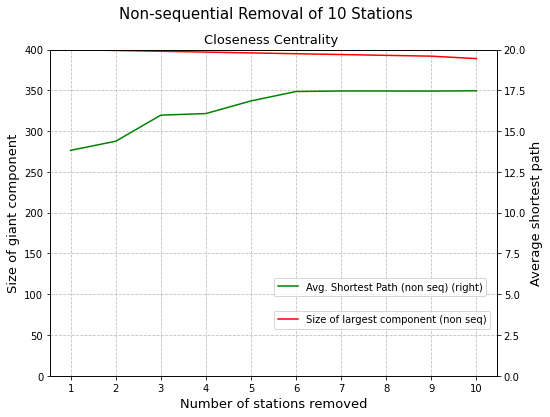

In [1221]:
# non sequential


# title
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Non-sequential Removal of 10 Stations", fontsize=15)

# x label
plt.xlabel("Number of stations removed", fontsize=13)

# plot
ax = df_closeness_all["Size of largest component (non seq)"].plot(
    ylim=(0, 400), color="red"
)
ax2 = df_closeness_all["Avg. Shortest Path (non seq)"].plot(
    secondary_y=True, ax=ax, color="green"
)

ax2.set_ylim(0, 20)


# legend and grid
ax2.legend(bbox_to_anchor=(0.5, 0.3), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.5, 0.2), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# labels
ax.set_ylabel("Size of giant component", fontsize=13)
ax2.set_ylabel("Average shortest path", fontsize=13)
plt.title("Closeness Centrality ", fontsize=13)

# x limit
plt.xticks(list(df_closeness_all.index))

plt.show()

### plot betweeness

In [1213]:
df_bet_all = pd.merge(df_bet_nonseq, df_bet_seq, left_index=True, right_index=True)

df_bet_all.index = np.arange(1, len(df_bet_all) + 1)
df_bet_all

df_bet_all.drop(
    columns=[
        "No. of Components (seq)",
        "Global efficiency (seq)",
        "No.of Components (non seq)",
        "Global efficiency (non seq)",
    ],
    inplace=True,
)
df_bet_all

Station Removed (non seq)  Avg. Shortest Path (non seq)  \
1                  Stratford                     14.496447   
2          Bank and Monument                     14.872497   
3           Liverpool Street                     15.031209   
4   King's Cross St. Pancras                     16.030742   
5                   Waterloo                     16.756742   
6                 Green Park                     17.180865   
7                     Euston                     16.807372   
8                Westminster                     16.975059   
9               Baker Street                     17.586339   
10             Finchley Road                     17.986979   

    Size of largest component (non seq)     Station Removed (seq)  \
1                                   379                 Stratford   
2                                   378  King's Cross St. Pancras   
3                                   377                  Waterloo   
4                                   371         Bank and Monument   
5                                   370              Canada Water   
6                                   369            West Hampstead   
7                                   346              Earl's Court   
8                                   345           Shepherd's Bush   
9                                   342                    Euston   
10                                  339              Baker Street   

    Avg. Shortest Path (seq)  Size of largest component (seq)  
1                  14.496447                              379  
2                  15.310134                              378  
3                  15.795939                              377  
4                  16.789631                              376  
5                  19.029234                              375  
6                  13.462360                              227  
7                  14.206450                              226  
8                  13.792046                              196  
9                  13.821885                              173  
10                 18.193596                              170

In [694]:
# #df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()


# fig, ax = plt.subplots(figsize = (9,6))
# df_closeness_all.plot(ax =ax, y=["Avg. Shortest Path (seq)","Avg. Shortest Path (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':15}
# font2 = {'family':'serif','color':'black','size':12}

# plt.title("Avg. shortest path after Removal of 10 Stations \n Using 2 methods for removal for betweeness Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed", fontdict = font2)
# plt.ylabel("Avg. Shortest Path", fontdict = font2)

# plt.xticks(list(df_closeness_all.index))

# plt.show()

In [695]:
# #df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()

# fig, ax = plt.subplots(figsize = (9,6))
# df_bet_all.plot(ax =ax, y=["No. of Components (seq)","No.of Components (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':15}
# font2 = {'family':'serif','color':'black','size':12}

# plt.title("Connected Components after Removal of 10 Stations \n Using 2 methods for removal for Betweeness Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed", fontdict = font2)
# plt.ylabel("Number of components", fontdict = font2)

# plt.xticks(list(df_closeness_all.index))

# plt.show()

In [698]:
# fig, ax = plt.subplots(figsize = (9,6))
# df_bet_all.plot(ax =ax, y=["Global efficiency (seq)","Global efficiency (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':15}
# font2 = {'family':'serif','color':'black','size':12}

# plt.title("Global efficiencies after Removal of 10 Stations \n Using 2 methods for removal for Betweeness Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed", fontdict = font2)
# plt.ylabel("Number of components", fontdict = font2)

# plt.xticks(list(df_closeness_all.index))

# plt.show()

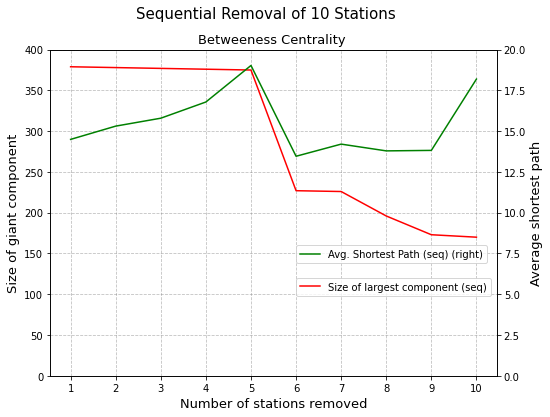

In [1223]:
# title
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Sequential Removal of 10 Stations", fontsize=15)

# x label
plt.xlabel("Number of stations removed", fontsize=13)

# plot
ax = df_bet_all["Size of largest component (seq)"].plot(ylim=(0, 400), color="red")
ax2 = df_bet_all["Avg. Shortest Path (seq)"].plot(
    secondary_y=True, ax=ax, color="green"
)

ax2.set_ylim(0, 20)

# legend and grid
ax2.legend(bbox_to_anchor=(0.55, 0.4), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.55, 0.3), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# labels
ax.set_ylabel("Size of giant component", fontsize=13)
ax2.set_ylabel("Average shortest path", fontsize=13)
plt.title("Betweeness Centrality ", fontsize=13)

# x limit
plt.xticks(list(df_bet_all.index))

plt.show()

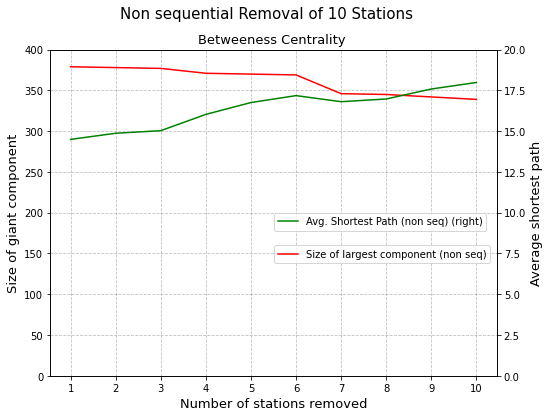

In [1224]:
# title
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Non sequential Removal of 10 Stations", fontsize=15)

# x label
plt.xlabel("Number of stations removed", fontsize=13)

# plot
ax = df_bet_all["Size of largest component (non seq)"].plot(ylim=(0, 400), color="red")
ax2 = df_bet_all["Avg. Shortest Path (non seq)"].plot(
    secondary_y=True, ax=ax, color="green"
)

ax2.set_ylim(0, 20)

# legend and grid
ax2.legend(bbox_to_anchor=(0.5, 0.5), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.5, 0.4), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# labels
ax.set_ylabel("Size of giant component", fontsize=13)
ax2.set_ylabel("Average shortest path", fontsize=13)
plt.title("Betweeness Centrality ", fontsize=13)

# x limit
plt.xticks(list(df_bet_all.index))

plt.show()

### plot degree

In [1214]:
df_deg_all = pd.merge(df_deg_nonseq, df_cent_seq, left_index=True, right_index=True)
df_deg_all


df_deg_all.index = np.arange(1, len(df_deg_all) + 1)


df_deg_all.drop(
    columns=[
        "No. of Components (seq)",
        "Global efficiency (seq)",
        "No.of Components (non seq)",
        "Global efficiency (non seq)",
    ],
    inplace=True,
)


df_deg_all

Station_removed (non seq)  Average Shortest Path (non seq)  \
1                  Stratford                        14.496447   
2          Bank and Monument                        14.872497   
3               Baker Street                        15.686438   
4   King's Cross St. Pancras                        17.013376   
5                   West Ham                        17.853836   
6               Canning Town                        17.693353   
7                   Waterloo                        18.139508   
8                 Green Park                        18.344521   
9              Oxford Circus                        18.419160   
10          Liverpool Street                        18.404775   

    Size of largest component (non seq)     Station Removed (seq)  \
1                                   379                 Stratford   
2                                   378         Bank and Monument   
3                                   377              Baker Street   
4                                   374  King's Cross St. Pancras   
5                                   371              Canning Town   
6                                   356                Green Park   
7                                   355              Earl's Court   
8                                   354                  Waterloo   
9                                   352             Oxford Circus   
10                                  346        Willesden Junction   

    Avg. Shortest Path (seq)  Size of largest component (seq)  
1                  14.496447                              379  
2                  14.872497                              378  
3                  15.686438                              377  
4                  17.013376                              374  
5                  17.376076                              360  
6                  17.531100                              359  
7                  17.894731                              358  
8                  18.493501                              357  
9                  18.574966                              355  
10                 21.207349                              341

In [704]:
# #df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()

# fig, ax = plt.subplots(figsize = (9,6))
# df_deg_all.plot(ax =ax, y=["No. of Components (seq)","No.of Components (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':15}
# font2 = {'family':'serif','color':'black','size':12}

# plt.title("Connected Components after Removal of 10 Stations \n Using 2 methods for removal for Degree Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed", fontdict = font2)
# plt.ylabel("Number of components", fontdict = font2)

# plt.xticks(list(df_deg_all.index))

# plt.show()

In [736]:
# #df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()

# fig, ax = plt.subplots(figsize = (9,6))
# df_deg_all.plot(ax =ax, y=["Avg. Shortest Path (seq)","Average Shortest Path (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':15}
# font2 = {'family':'serif','color':'black','size':12}

# plt.title("Avg. shortest path after Removal of 10 Stations \n Using 2 methods for removal for Degree Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed", fontdict = font2)
# plt.ylabel("Avg. Shortest Path", fontdict = font2)

# plt.xticks(list(df_deg_all.index))

# plt.show()

In [737]:
# fig, ax = plt.subplots(figsize = (9,6))
# df_deg_all.plot(ax =ax, y=["Global efficiency (seq)","Global efficiency (non seq)"])

# #labels
# #fig, ax = plt.subplots(figsize = (20,20))
# font1 = {'family':'serif','color':'black','size':15}
# font2 = {'family':'serif','color':'black','size':12}

# plt.title("Global after Removal of 10 Stations \n Using 2 methods for removal for Degree Centrality ",fontdict = font1 )
# plt.xlabel("Number of stations removed", fontdict = font2)
# plt.ylabel("Avg. Shortest Path", fontdict = font2)

# plt.xticks(list(df_deg_all.index))

# plt.show()

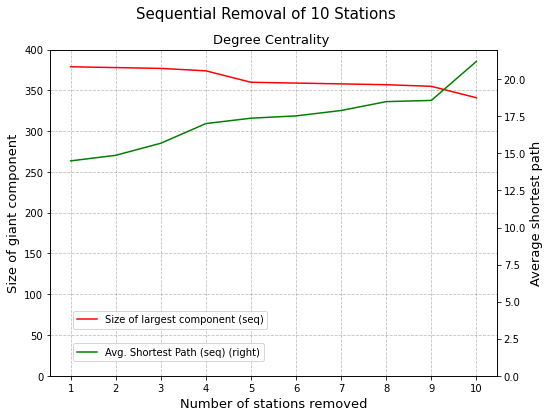

In [1227]:
import numpy as np
import pylab as pl

# title
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Sequential Removal of 10 Stations", fontsize=15)

# x label
plt.xlabel("Number of stations removed", fontsize=13)

# plot
ax = df_deg_all["Size of largest component (seq)"].plot(ylim=(0, 400), color="red")
# ax2 = ax.twinx()
ax2 = df_deg_all["Avg. Shortest Path (seq)"].plot(secondary_y=True, color="green")

ax2.set_ylim(0, 22)

# secax1 = ax.secondary_yaxis("right", functions =(lambda x: 0.00025*x, lambda x: 0.00025*x))
# secax1.set_ylabel("Size of Giant Component")


# legend and grid
ax2.legend(bbox_to_anchor=(0.05, 0.1), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# labels
ax.set_ylabel("Size of giant component", fontsize=13)
ax2.set_ylabel(
    "Average shortest path",
    fontsize=13,
)
plt.title("Degree Centrality ", fontsize=13)

# x limit
plt.xticks(list(df_closeness_all.index))


# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

# #y labels limit
# newYlabel = ['0.65, 0.07, 0.075','0.080','0.085','0.090','0.095', '0.100']
# ax2.set_yticklabels(newYlabel)

# ax2.yticks(0,0.1)

plt.show()


# #df = pd.DataFrame({'Date':pd.date_range('2019-02-01', periods=10), 'Col1':np.random.randint(0,10,10), 'Col2':np.random.randint(100,500, 10)})
# ax = df_deg_all[["Station_removed (non seq)" ,"Size of largest component (non seq)","Global efficiency (non seq)"]].plot(x="Station_removed (non seq)" ,y=["Size of largest component (non seq)","Global efficiency (non seq)"],secondary_y="Global efficiency (non seq)", ylim = ([0,0.1]))
# ax.set_ylim(0,0.1)
# fig = ax.get_figure()
# ax = fig.get_axes()
# ax[1].set_ylim(0,0.1)

In [947]:
# # Degree Centrality Plot
# fig, ax = plt.subplots(1,2,figsize=(15,5))
# fig.suptitle("Change in ‘Number of Nodes in Giant Component’ and ‘Efficiency’ after Node Removals (Degree Centrality)")
# ax1 = ax[0]
# #ax2 = ax[1]
# # Non-Sequential
# ax1.plot(df_deg_all["Global efficiency (non seq)"], color = "red", label = 'Nodes in Giant Component')
# ax1.plot(df_deg_all["Size of largest component (non seq)"], color = "blue", label = 'Efficiency')
# ax1.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
# ax1.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
# ax1.set_ylabel("Global Efficiency (lc)")   #plt.ylabel("Values")
# ax1.set_ylim(0.0,0.1)
# secax1 = ax1.secondary_yaxis("right")
# secax1.set_ylabel("Size of Giant Component (ef)")
# ax1.set_xticks(list(df_deg_all.index))
# ax1.set_xticklabels(df_deg_all["Station_removed (non seq)"], rotation=90)# plt.xlabel("Removed node")
# ax1.legend(loc=3) #'upper left' 'best'
# ax1.set_title('Non-Sequential')

# # #Sequential
# # ax2.plot(df_deg_all["Size of largest component (seq)" ], color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
# # ax2.plot(df_deg_all["Global efficiency (seq)"], color = "blue", label = 'Efficiency')#rang(0:10),
# # ax2.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
# # ax2.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
# # ax2.set_ylabel("Global Efficiency")   #plt.ylabel("Values")
# # ax2.set_ylim(0.04,0.105)
# # secax2 = ax2.secondary_yaxis("right", functions=(lambda x: 4000*x, lambda x: 4000*x))
# # secax2.set_ylabel("Size of Giant Component")
# # ax2.set_xticks(list(range(0,10)))
# # ax2.set_xticklabels(df_deg_all["Station Removed (seq)"], rotation=90)# plt.xlabel("Removed node")
# # ax2.legend(loc=1) #'upper left' 'best'
# # ax2.set_title('Sequential')

# # fig.subplots_adjust(wspace=0.29,hspace=0.0)
# plt.show()


# # 0.1*4000 = 400

# 400*0.00025

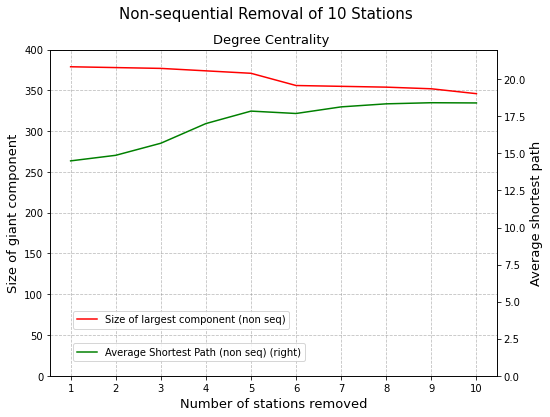

In [1229]:
# title
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Non-sequential Removal of 10 Stations", fontsize=15)

# x label
plt.xlabel("Number of stations removed", fontsize=13)

# plot
ax = df_deg_all["Size of largest component (non seq)"].plot(ylim=(0, 400), color="red")
ax2 = df_deg_all["Average Shortest Path (non seq)"].plot(
    secondary_y=True, color="green"
)


ax2.set_ylim(0, 22)

# legend and grid
ax2.legend(bbox_to_anchor=(0.05, 0.1), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# labels
ax.set_ylabel("Size of giant component", fontsize=13)
ax2.set_ylabel("Average shortest path", fontsize=13)
plt.title("Degree Centrality ", fontsize=13)

# x limit
plt.xticks(list(df_closeness_all.index))

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.show()

In [955]:
# # # Degree Centrality Plot
# # fig, ax = plt.subplots(1,2,figsize=(13,5))
# # fig.suptitle("Change in ‘Number of Nodes in Giant Component’ and ‘Efficiency’ after Node Removals (Degree Centrality)")
# # ax1 = ax[0]
# # ax2 = ax[1]
# # # "Size of largest component (non seq)"
# # #Non-Sequential
# # ax1.plot(df_deg_all["Size of largest component (non seq)"], color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
# # ax1.plot(df_deg_all["Global efficiency (non seq)" ], color = "green", label = 'Efficiency')#rang(0:10),
# # ax1.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
# # ax1.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
# # ax1.set_ylabel("Size of Giant Component")   #plt.ylabel("Values")
# # ax1.set_ylim(0,400)
# # secax1 = ax1.secondary_yaxis("right")
# # #, functions=(lambda x: 0.0001*x, lambda x: 0.0001*x
# # secax1.set_ylabel("Efficiency")
# # ax1.set_xticks(list(range(0,10)))
# # ax1.set_xticklabels(df_deg_all["Station_removed (non seq)" ], rotation=90)# plt.xlabel("Removed node")
# # ax1.legend(loc=3) #'upper left' 'best'
# # ax1.set_title('Non-Sequential')

# #df = pd.DataFrame({'Date':pd.date_range('2019-02-01', periods=10), 'Col1':np.random.randint(0,10,10), 'Col2':np.random.randint(100,500, 10)})
# ax = df_deg_all[["Station_removed (non seq)" ,"Size of largest component (non seq)","Global efficiency (non seq)"]].plot(x="Station_removed (non seq)" ,y=["Size of largest component (non seq)","Global efficiency (non seq)"],secondary_y="Global efficiency (non seq)", ylim = ([0,0.1]))
# ax.set_ylim(0,0.1)
# fig = ax.get_figure()
# ax = fig.get_axes()
# ax[1].set_ylim(0,0.1)

# # ax = df[["Date","Col1","Col2"]].plot(x="Date",y=["Col1","Col2"],secondary_y="Col2", ylim = ([0,5]))
# # ax.right_ax.set_ylim(0,250)


# # #Sequential
# # ax2.plot(degc_t_largec1x, color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
# # ax2.plot(degc_t_efficiency1, color = "blue", label = 'Efficiency')#rang(0:10),
# # ax2.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
# # ax2.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
# # ax2.set_ylabel("Global Efficiency")   #plt.ylabel("Values")
# # ax2.set_ylim(0.04,0.105)
# # secax2 = ax2.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
# # secax2.set_ylabel("Size of Giant Component")
# # ax2.set_xticks(list(range(0,11)))
# # ax2.set_xticklabels(degc_t_removednode1, rotation=90)# plt.xlabel("Removed node")
# # ax2.legend(loc=1) #'upper left' 'best'
# # ax2.set_title('Sequential')

# # # fig.subplots_adjust(wspace=0.29,hspace=0.0)
# plt.show()

# II.- Flows: weighted network: 14 marks
- whether different measures need to be used when flows are considered
- flows of passengers were assigned to the links between stations.


### II.1. Old vs new measure: 3
- indicating the most relevant stations for assessing the vulnerability of the underground based on non weighted
- What would you need to do to adjust this measure for a weighted network? (need to consider the distance or weights between the nodess?) 
- Recompute the ranking of the 10 most important nodes according to this adjusted measure. Do you find the same ones as in I.1?
 

In [57]:
# adjust measures for three centrality measures by showing the weights for each

#### Betweeness centrality with weights 

In [1245]:
# first thing we need to create a copy in orer to delete 3 nodes with 0 flows
G_e = G.copy()

In [1246]:
ll = list(G_e.nodes)
len(ll)

401

In [1247]:
# Lets check node attributes
list(G_e.edges(data=True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [1248]:
list(G_e.nodes(data=True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'degree': 0.01,
  'betweeness_t': 10780.813492063491,
  'closeness_t': 0.09465215333648841})

In [1249]:
# remove nodes with flows of 0: .wandsworth and battersea park and something with n

# lets convert them to a df just for better visuals
df = pd.DataFrame(index=G_e.edges())
df["flows"] = pd.Series(nx.get_edge_attributes(G_e, "flows"))
df
# #sort highest 10 station of degree centrality
df_sorted = df.sort_values(["flows"], ascending=True)
df_sorted[0:10]

# we need to drop flows with 0: Nine Elms, Battersea Park, Wandsworth Road from the graph itself

flows
Kennington              Nine Elms                     0
Battersea Power Station Nine Elms                     0
Wandsworth Road         Battersea Park                0
Elephant & Castle       Lambeth North                94
Theobalds Grove         Cheshunt                    287
Heathrow Terminal 4     Heathrow Terminals 2 & 3    310
Stratford High Street   Abbey Road                  343
Canning Town            Star Lane                   452
Hainault                Grange Hill                 504
West Ham                Abbey Road                  601

In [1250]:
# remove nodes

G_e.remove_nodes_from(["Nine Elms", "Battersea Park", "Battersea Power Station"])
# number of nodes after the removal
print(len(list(G_e.nodes)))

398


In [1251]:
# inverse the weights since higher flows actually indicate stronger connection (unlike distance)

inv_flows = {
    (e1, e2): round(1.0 / weight, 7) for e1, e2, weight in G_e.edges(data="flows")
}

In [1252]:
# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G_e, inv_flows, "inv_flows")

In [1253]:
bet_london_w = nx.betweenness_centrality(G_e, weight="inv_flows", normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G_e, bet_london_w, "inv_betweenness_w")

In [1254]:
list(G_e.edges(data=True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483,
  'line_name': 'Jubilee',
  'flows': 12356,
  'inv_flows': 8.09e-05})

In [1255]:
list(G_e.nodes(data=True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'degree': 0.01,
  'betweeness_t': 10780.813492063491,
  'closeness_t': 0.09465215333648841,
  'inv_betweenness_w': 11449.0})

In [1310]:
df_betweeness_w = pd.DataFrame.from_dict(
    bet_london_w, columns=["weighted_betweenness_centrality"], orient="index"
)
# sort highest 10 station of degree centrality
# df
# df_sorted = df_betweeness_w.sort_values(['weighted_betweenness_centrality'], ascending =False)
# df_sorted[0:10]
df_betweeness_w = df_betweeness_w.sort_values(
    ["weighted_betweenness_centrality"], ascending=False
)
df_betweeness_w[0:10]
# this is the non sequential top 10 list//later on we need the sequential

weighted_betweenness_centrality
Green Park                                 44945.0
Bank and Monument                          39913.0
Waterloo                                   32331.0
Westminster                                29830.0
Liverpool Street                           26617.0
Stratford                                  26203.0
Bond Street                                23084.0
Euston                                     22419.0
Oxford Circus                              21320.0
Warren Street                              20023.0

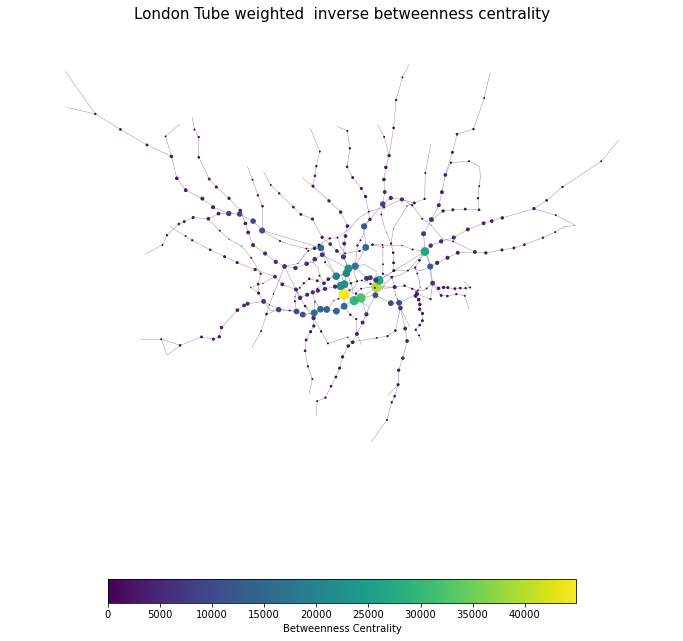

In [1257]:
# Lets set colour and size of nodes according to betweenness values before removal
betweenness_w_values = [(i[1]["inv_betweenness_w"]) for i in G_e.nodes(data=True)]


bet_t_color = [(i[1]["inv_betweenness_w"]) for i in G_e.nodes(data=True)]
bet_t_size = [
    (i[1]["inv_betweenness_w"] / max(betweenness_w_values)) * 100
    for i in G_e.nodes(data=True)
]

# Plot graph
fig, ax = plt.subplots(figsize=(12, 12))

nx.draw_networkx_edges(G_e, pos, edge_color="gray", width=0.4)

nod = nx.draw_networkx_nodes(G_e, pos=pos, node_color=bet_t_color, node_size=bet_t_size)

plt.colorbar(nod, label="Betweenness Centrality", orientation="horizontal", shrink=0.7)
plt.axis("off")
plt.title("London Tube weighted  inverse betweenness centrality", fontsize=15)
plt.show()

### II.2. Impact measure with flows: 3
- Would you adjust the measure for a weighted network? If yes, how? 
- Propose a different measure that would be better at assessing the impact of closing a station taking into consideration the passengers. (look at lectures for this..) (no coding here)



- number componenets
- degree distribution: or average degree: higher degree distribution means higher relience: higher deree in moncenteic city high in or high out...
- average shortest path: week 9
- clustering coefficient
- diameter 
- average degree 

. The average path length, together with the
clustering coefficient described above, contributes to underline possible small-world
behaviour of the network

### III.3. Experiment with flows: 8


##### before dropping anything

In [1258]:
print(nx.is_connected(G_e))

True


In [1259]:
# number of connected components
nx.number_connected_components(G_e)

1

In [1260]:
# To comput the size ( number of node) of each component
Subg = [G_e.subgraph(c).copy() for c in nx.connected_components(G_e)]
[len(subgraph.nodes) for subgraph in Subg]

[398]

In [1261]:
# avg shortest path of entire netowrk.
sh_path_w = nx.average_shortest_path_length(
    G_e, weight="inv_flows"
)  # grab inverted weight
sh_path_w

# 1992.51

# old: 255693.32300498753

0.0008157978810931205

In [1262]:
avg_clus = nx.average_clustering(G_e, weight="inv_flows")
avg_clus

0.000709333923852906

In [75]:
# avg clustering coefficient
avg_clus_w = nx.average_clustering(G_e, weight="inv_flows")
avg_clus_w

# 7.4 power -11..
# avg deg
# efficiencies

##higher flow the more important where as higher distance the less important
# first remove flows of 0 or change g.edge flows to 0.000001..wandsworth and battersea park


# avg degree: sangbins paper for weights
# in weights, removing 1 isnt enough to show the impact..use multiple drops and sequential..

0.000709333923852906

In [76]:
##################################################################################

##### now drop the highest betweenes node 


In [77]:
# first remove stratford (highest rank in the unweighted)
# apply the sp and and av clustering

#### avg sp  & clust coef  on betweeness t (stratford)

In [1311]:
Ge_uw = G_e.copy()

In [1312]:
avg_clus = nx.average_clustering(Ge_uw, weight="inv_flows")
avg_clus

0.000709333923852906

In [79]:
# list(Ge_uw.nodes(data=True))[0]

In [80]:
# l1=list(Ge_uw.nodes)
# len(l1)

In [81]:
# betweenness_w_values=[(i[1]['betweeness_t']) for i in Ge_uw.nodes(data=True)]


# maxbet=[n for n in Ge_uw.nodes() if Ge_uw.nodes[n]['betweeness_t'] == max(betweenness_w_values)]
# #maxbet

# print(maxbet)

In [82]:
# Ge_uw.remove_nodes_from(maxbet)

In [83]:
# l1=list(Ge_uw.nodes)
# len(l1)

In [84]:
# #now cal avg shortest path of largest component

# components = nx.connected_components(Ge_uw)
# print(f"Number of components {No_components}")

# # Use the max() command to find the largest one:
# largest_component = max(components, key=len)

# # Create a "subgraph" of the largest component
# largest_subgraph = Ge_uw.subgraph(largest_component)

# # average_shortest_path_length for the largest component
# Sh_path_w=nx.average_shortest_path_length(largest_subgraph, weight='inv_flows')
# #Sh_path_list_w.append(Sh_path)
# print(f"Average shortest path in largest component is {Sh_path_w}")

# #here we can see how the avg sgortest path increases as we drop stratford

In [85]:
# #avg clustering coefficient
# avg_clus_w = nx.average_clustering(Ge_uw, weight = 'inv_flows')
# avg_clus_w

In [86]:
#############################################################################

#### sequential removal: betweeness of old stations using 2 new measures accounting for weights

In [1129]:
list(Ge_uw.nodes(data=True))[0:2]

[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672),
   'degree': 0.01,
   'betweeness_t': 10780.813492063491,
   'closeness_t': 0.09465215333648841,
   'inv_betweenness_w': 11449.0}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083),
   'degree': 0.005,
   'betweeness_t': 1191.0,
   'closeness_t': 0.08659883091578263,
   'inv_betweenness_w': 1182.0})]

In [1156]:
list(Ge_uw.nodes(data=True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'degree': 0.01,
  'betweeness_t': 10780.813492063491,
  'closeness_t': 0.09465215333648841,
  'inv_betweenness_w': 11449.0})

In [1134]:
nx.number_connected_components(Ge_uw)

1

In [1313]:
# empty lists
Sh_path_list = []
clust_list = []
station_removed = []
global_eff_w_list = []

for j in range(0, 10):

    # extract the degree values from each of prev calcluated degrees, pick the max
    bet_values = [(i[1]["betweeness_t"]) for i in Ge_uw.nodes(data=True)]
    maxdeg = [
        n for n in Ge_uw.nodes() if Ge_uw.nodes[n]["betweeness_t"] == max(bet_values)
    ]
    print(maxdeg)
    # append to list of stations removed
    station_removed.append(maxdeg[0])

    # remove node:
    Ge_uw.remove_nodes_from([maxdeg[0]])
    # number of nodes after the removal
    print(len(list(Ge_uw.nodes)))

    # recalculate the betweeness centrality using networkx function:
    bet_cen_new = nx.betweenness_centrality(Ge_uw)
    nx.set_node_attributes(Ge_uw, dict(bet_cen_new), "betweeness_t")

    # calculate no of components
    clust = nx.average_clustering(Ge_uw, weight="inv_flows")
    # append to list
    clust_list.append(clust)
    print(f"Average clustering coefficient:  {clust}")

    components = nx.connected_components(Ge_uw)
    # print(f"Number of components {No_components}")
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    largest_subgraph = Ge_uw.subgraph(largest_component)

    # average_shortest_path_length for the largest component
    Sh_path = nx.average_shortest_path_length(largest_subgraph, weight="inv_flows")
    Sh_path_list.append(Sh_path)
    print(f"Average shortest path in largest component is {Sh_path}")

    # global_efficiency weighted

    global_eff_w = 1 / Sh_path
    global_eff_w_list.append(global_eff_w)

    #     global_efficiency=nx.global_efficiency(largest_subgraph)
    #     global_efficiency_list.append(global_efficiency)
    print(f"weighted global_efficiency {global_eff_w_list}")

['Stratford']
397
Average clustering coefficient:  0.0007138073252090059
Average shortest path in largest component is 0.0011225375078014108
weighted global_efficiency [890.8388299279092]
["King's Cross St. Pancras"]
396
Average clustering coefficient:  0.0007183042866371843
Average shortest path in largest component is 0.0012503585212121288
weighted global_efficiency [890.8388299279092, 799.7706122165465]
['Waterloo']
395
Average clustering coefficient:  0.0007178070980493669
Average shortest path in largest component is 0.0013820304052988399
weighted global_efficiency [890.8388299279092, 799.7706122165465, 723.5730821593376]
['Bank and Monument']
394
Average clustering coefficient:  0.0007187205378862217
Average shortest path in largest component is 0.0014979307604716168
weighted global_efficiency [890.8388299279092, 799.7706122165465, 723.5730821593376, 667.587599099143]
['Canada Water']
393
Average clustering coefficient:  0.0007205493433261358
Average shortest path in largest comp

In [1269]:
df_bet_seq_2m = pd.DataFrame(
    list(zip(station_removed, clust_list, Sh_path_list)),
    columns=[
        "Station Removed (seq)",
        "Avg Clustering coefficient (seq)",
        "Avg. Shortest Path (seq)",
    ],
)

# title
# df_bet_seq_2m = df_bet_seq_2m.style.set_caption ('Sequential Removal for Betweeness Centrality: unweighted using 2 new measures')
df_bet_seq_2m

Station Removed (seq)  Avg Clustering coefficient (seq)  \
0                 Stratford                          0.000714   
1  King's Cross St. Pancras                          0.000718   
2                  Waterloo                          0.000718   
3         Bank and Monument                          0.000719   
4              Canada Water                          0.000721   
5            West Hampstead                          0.000722   
6              Earl's Court                          0.000647   
7           Shepherd's Bush                          0.000648   
8                    Euston                          0.000595   
9              Baker Street                          0.000560   

   Avg. Shortest Path (seq)  
0                  0.001123  
1                  0.001250  
2                  0.001382  
3                  0.001498  
4                  0.002097  
5                  0.000922  
6                  0.001022  
7                  0.001012  
8                  0.001384  
9                  0.001922

#### avg sp & clust coef on betweeness w (green park)

In [1314]:
Ge_w = G_e.copy()

In [1315]:
betweenness_w_values = [(i[1]["inv_betweenness_w"]) for i in Ge_w.nodes(data=True)]


maxbet = [
    n
    for n in Ge_w.nodes()
    if Ge_w.nodes[n]["inv_betweenness_w"] == max(betweenness_w_values)
]
# maxbet

print(maxbet)

['Green Park']


In [91]:
# G4b_w.remove_nodes_from(maxbet)

In [92]:
# l1=list(G4b.nodes)
# len(l1)

In [93]:
# #now cal avg shortest path of largest component

# components = nx.connected_components(G4b_w)
# print(f"Number of components {No_components}")

# # Use the max() command to find the largest one:
# largest_component = max(components, key=len)

# # Create a "subgraph" of the largest component
# largest_subgraph = G4b_w.subgraph(largest_component)

# # average_shortest_path_length for the largest component
# Sh_path_w=nx.average_shortest_path_length(largest_subgraph, weight='flows')
# #Sh_path_list_w.append(Sh_path)
# print(f"Average shortest path in largest component is {Sh_path_w}")

# #here we see that avg shortest path is higher when removing the betweeness centrality i=of weighted.

# avg sp should be aprox 2000

In [94]:
# #avg clustering coefficient
# avg_clus_w = nx.average_clustering(G4b_w, weight = 'flows')
# avg_clus_w

In [1316]:
# empty lists
Sh_path_list = []
clust_list = []
station_removed = []
global_eff_w_list = []


for j in range(0, 10):

    # extract the degree values from each of prev calcluated degrees, pick the max
    bet_values = [(i[1]["inv_betweenness_w"]) for i in Ge_w.nodes(data=True)]
    maxdeg = [
        n for n in Ge_w.nodes() if Ge_w.nodes[n]["inv_betweenness_w"] == max(bet_values)
    ]
    print(maxdeg)
    # append to list of stations removed
    station_removed.append(maxdeg[0])

    # remove node:
    Ge_w.remove_nodes_from([maxdeg[0]])
    # number of nodes after the removal
    print(len(list(Ge_w.nodes)))

    # recalculate the degree centrality using networkx function:
    bet_cen_new = nx.betweenness_centrality(Ge_w)
    nx.set_node_attributes(Ge_w, dict(bet_cen_new), "inv_betweenness_w")

    # calculate no of components
    clust = nx.average_clustering(Ge_w, weight="inv_flows")
    # append to list
    clust_list.append(clust)
    print(f"Average clustering coefficient:  {clust}")

    components = nx.connected_components(Ge_w)
    # print(f"Number of components {No_components}")
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    largest_subgraph = Ge_w.subgraph(largest_component)
    # average_shortest_path_length for the largest component
    Sh_path = nx.average_shortest_path_length(largest_subgraph, weight="inv_flows")
    Sh_path_list.append(Sh_path)
    print(f"Average shortest path in largest component is {Sh_path}")

    global_eff_w = 1 / Sh_path
    global_eff_w_list.append(global_eff_w)

['Green Park']
397
Average clustering coefficient:  0.0007151587643451464
Average shortest path in largest component is 0.0008434015316896918
["King's Cross St. Pancras"]
396
Average clustering coefficient:  0.0007196591384984161
Average shortest path in largest component is 0.0009552448804500851
['Bank and Monument']
395
Average clustering coefficient:  0.0007209012124167777
Average shortest path in largest component is 0.0010541453010345047
['Canada Water']
394
Average clustering coefficient:  0.0007227309109254496
Average shortest path in largest component is 0.0016066646672091725
['West Hampstead']
393
Average clustering coefficient:  0.0007245699208769139
Average shortest path in largest component is 0.0008945326873798821
['Stratford']
392
Average clustering coefficient:  0.0007290424106542724
Average shortest path in largest component is 0.0008945326873798821
["Earl's Court"]
391
Average clustering coefficient:  0.0006534091544143721
Average shortest path in largest component is 

In [1299]:
df_bet_seq_2m_w = pd.DataFrame(
    list(zip(station_removed, clust_list, Sh_path_list)),
    columns=[
        "Station Removed (seq)_w",
        "Avg Clustering coefficient (seq)_w",
        "Avg. Shortest Path (seq)_w",
    ],
)

# title
# df_bet_seq_2m_w = df_bet_seq_2m_w.style.set_caption ('Sequential Removal for Betweeness Centrality: unweighted using 2 new measures')
df_bet_seq_2m_w

Station Removed (seq)_w  Avg Clustering coefficient (seq)_w  \
0                Green Park                            0.000715   
1  King's Cross St. Pancras                            0.000720   
2         Bank and Monument                            0.000721   
3              Canada Water                            0.000723   
4            West Hampstead                            0.000725   
5                 Stratford                            0.000729   
6              Earl's Court                            0.000653   
7           Shepherd's Bush                            0.000655   
8             Oxford Circus                            0.000683   
9              Queen's Park                            0.000685   

   Avg. Shortest Path (seq)_w  
0                    0.000843  
1                    0.000955  
2                    0.001054  
3                    0.001607  
4                    0.000895  
5                    0.000895  
6                    0.000986  
7                    0.000992  
8                    0.001300  
9                    0.001648

In [1302]:
# df_closeness_all = df_close_seq.join(df_clo_nonseq),index=True
df_bet_all = pd.merge(df_bet_seq_2m, df_bet_seq_2m_w, left_index=True, right_index=True)

# df_bet_all.index = np.arange(1, len(df_bet_all) + 1)

df_bet_all

Station Removed (seq)  Avg Clustering coefficient (seq)  \
0                 Stratford                          0.000714   
1  King's Cross St. Pancras                          0.000718   
2                  Waterloo                          0.000718   
3         Bank and Monument                          0.000719   
4              Canada Water                          0.000721   
5            West Hampstead                          0.000722   
6              Earl's Court                          0.000647   
7           Shepherd's Bush                          0.000648   
8                    Euston                          0.000595   
9              Baker Street                          0.000560   

   Avg. Shortest Path (seq)   Station Removed (seq)_w  \
0                  0.001123                Green Park   
1                  0.001250  King's Cross St. Pancras   
2                  0.001382         Bank and Monument   
3                  0.001498              Canada Water   
4                  0.002097            West Hampstead   
5                  0.000922                 Stratford   
6                  0.001022              Earl's Court   
7                  0.001012           Shepherd's Bush   
8                  0.001384             Oxford Circus   
9                  0.001922              Queen's Park   

   Avg Clustering coefficient (seq)_w  Avg. Shortest Path (seq)_w  
0                            0.000715                    0.000843  
1                            0.000720                    0.000955  
2                            0.000721                    0.001054  
3                            0.000723                    0.001607  
4                            0.000725                    0.000895  
5                            0.000729                    0.000895  
6                            0.000653                    0.000986  
7                            0.000655                    0.000992  
8                            0.000683                    0.001300  
9                            0.000685                    0.001648

In [1303]:
df_bet_all.loc[-1] = [
    "No removals",
    0.0007093,
    0.00081578,
    "No removals",
    0.0007093,
    0.00081578,
]

df_bet_all

Station Removed (seq)  Avg Clustering coefficient (seq)  \
 0                 Stratford                          0.000714   
 1  King's Cross St. Pancras                          0.000718   
 2                  Waterloo                          0.000718   
 3         Bank and Monument                          0.000719   
 4              Canada Water                          0.000721   
 5            West Hampstead                          0.000722   
 6              Earl's Court                          0.000647   
 7           Shepherd's Bush                          0.000648   
 8                    Euston                          0.000595   
 9              Baker Street                          0.000560   
-1               No removals                          0.000709   

    Avg. Shortest Path (seq)   Station Removed (seq)_w  \
 0                  0.001123                Green Park   
 1                  0.001250  King's Cross St. Pancras   
 2                  0.001382         Bank and Monument   
 3                  0.001498              Canada Water   
 4                  0.002097            West Hampstead   
 5                  0.000922                 Stratford   
 6                  0.001022              Earl's Court   
 7                  0.001012           Shepherd's Bush   
 8                  0.001384             Oxford Circus   
 9                  0.001922              Queen's Park   
-1                  0.000816               No removals   

    Avg Clustering coefficient (seq)_w  Avg. Shortest Path (seq)_w  
 0                            0.000715                    0.000843  
 1                            0.000720                    0.000955  
 2                            0.000721                    0.001054  
 3                            0.000723                    0.001607  
 4                            0.000725                    0.000895  
 5                            0.000729                    0.000895  
 6                            0.000653                    0.000986  
 7                            0.000655                    0.000992  
 8                            0.000683                    0.001300  
 9                            0.000685                    0.001648  
-1                            0.000709                    0.000816

In [1304]:
df_bet_all.index = df_bet_all.index + 1
df_bet_all.sort_index(inplace=True)

In [1305]:
df_bet_all
# df_bet_all.index = np.arange(0, len(df_bet_all) + 1)
# df_bet_all

Station Removed (seq)  Avg Clustering coefficient (seq)  \
0                No removals                          0.000709   
1                  Stratford                          0.000714   
2   King's Cross St. Pancras                          0.000718   
3                   Waterloo                          0.000718   
4          Bank and Monument                          0.000719   
5               Canada Water                          0.000721   
6             West Hampstead                          0.000722   
7               Earl's Court                          0.000647   
8            Shepherd's Bush                          0.000648   
9                     Euston                          0.000595   
10              Baker Street                          0.000560   

    Avg. Shortest Path (seq)   Station Removed (seq)_w  \
0                   0.000816               No removals   
1                   0.001123                Green Park   
2                   0.001250  King's Cross St. Pancras   
3                   0.001382         Bank and Monument   
4                   0.001498              Canada Water   
5                   0.002097            West Hampstead   
6                   0.000922                 Stratford   
7                   0.001022              Earl's Court   
8                   0.001012           Shepherd's Bush   
9                   0.001384             Oxford Circus   
10                  0.001922              Queen's Park   

    Avg Clustering coefficient (seq)_w  Avg. Shortest Path (seq)_w  
0                             0.000709                    0.000816  
1                             0.000715                    0.000843  
2                             0.000720                    0.000955  
3                             0.000721                    0.001054  
4                             0.000723                    0.001607  
5                             0.000725                    0.000895  
6                             0.000729                    0.000895  
7                             0.000653                    0.000986  
8                             0.000655                    0.000992  
9                             0.000683                    0.001300  
10                            0.000685                    0.001648

Text(0, 0.5, 'Avg shortest path')

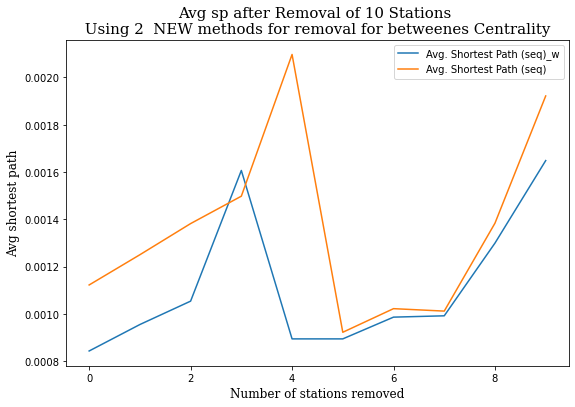

In [98]:
# df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()

fig, ax = plt.subplots(figsize=(9, 6))
df_bet_all.plot(ax=ax, y=["Avg. Shortest Path (seq)_w", "Avg. Shortest Path (seq)"])

# labels
# fig, ax = plt.subplots(figsize = (20,20))
font1 = {"family": "serif", "color": "black", "size": 15}
font2 = {"family": "serif", "color": "black", "size": 12}

plt.title(
    "Avg sp after Removal of 10 Stations \n Using 2  NEW methods for removal for betweenes Centrality ",
    fontdict=font1,
)
plt.xlabel("Number of stations removed", fontdict=font2)
plt.ylabel("Avg shortest path", fontdict=font2)

# plot the results on London

# cluster_mapping_shape_file.plot(column = "Cluster", categorical = True, legend=True, ax=ax)
# ax.set_axis_off()

Text(0, 0.5, 'Avg shortest path')

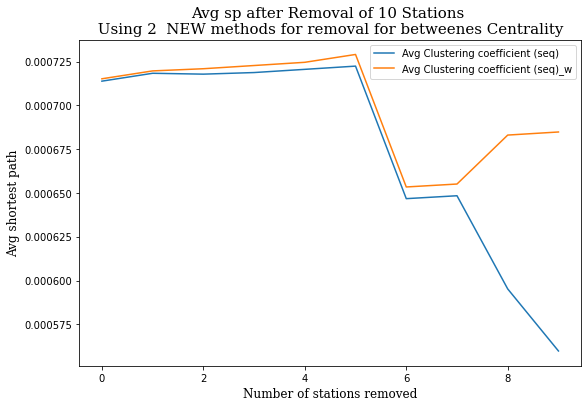

In [99]:
# df_deg_all_avgpath["Avg. Shortest Path"],['No. of Components'].plot()

fig, ax = plt.subplots(figsize=(9, 6))
df_bet_all.plot(
    ax=ax, y=["Avg Clustering coefficient (seq)", "Avg Clustering coefficient (seq)_w"]
)

# labels
# fig, ax = plt.subplots(figsize = (20,20))
font1 = {"family": "serif", "color": "black", "size": 15}
font2 = {"family": "serif", "color": "black", "size": 12}

plt.title(
    "Avg sp after Removal of 10 Stations \n Using 2  NEW methods for removal for betweenes Centrality ",
    fontdict=font1,
)
plt.xlabel("Number of stations removed", fontdict=font2)
plt.ylabel("Avg shortest path", fontdict=font2)

# plot the results on London

# cluster_mapping_shape_file.plot(column = "Cluster", categorical = True, legend=True, ax=ax)
# ax.set_axis_off()

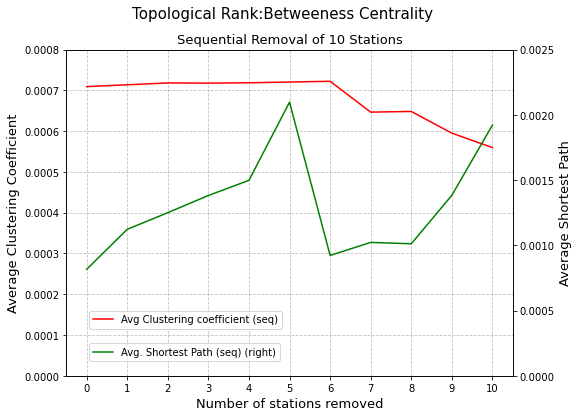

In [1308]:
# title
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Topological Rank:Betweeness Centrality", fontsize=15)

# x label
plt.xlabel("Number of stations removed", fontsize=13)

# plot
ax = df_bet_all["Avg Clustering coefficient (seq)"].plot(
    ylim=(0, 0.000800), color="red"
)
ax2 = df_bet_all["Avg. Shortest Path (seq)"].plot(secondary_y=True, color="green")


ax2.set_ylim(0.0000, 0.0025)

# legend and grid
ax2.legend(bbox_to_anchor=(0.05, 0.1), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# labels
ax.set_ylabel("Average Clustering Coefficient", fontsize=13)
ax2.set_ylabel("Average Shortest Path", fontsize=13)
plt.title("Sequential Removal of 10 Stations", fontsize=13)

# x limit
plt.xticks(list(df_bet_all.index))

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.show()

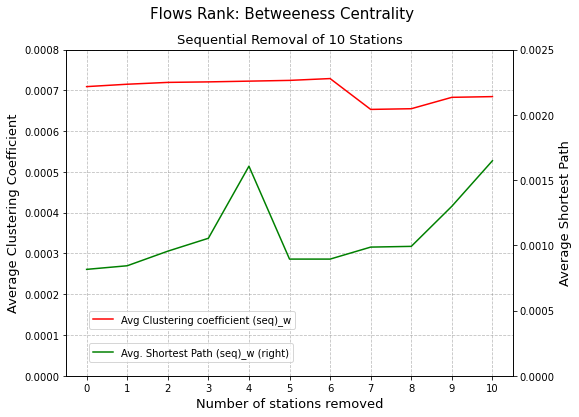

In [1309]:
# title
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Flows Rank: Betweeness Centrality", fontsize=15)

# x label
plt.xlabel("Number of stations removed", fontsize=13)

# plot
ax = df_bet_all["Avg Clustering coefficient (seq)_w"].plot(
    ylim=(0, 0.000800), color="red"
)
ax2 = df_bet_all["Avg. Shortest Path (seq)_w"].plot(secondary_y=True, color="green")


ax2.set_ylim(0.0000, 0.0025)

# legend and grid
ax2.legend(bbox_to_anchor=(0.05, 0.1), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# labels
ax.set_ylabel("Average Clustering Coefficient", fontsize=13)
ax2.set_ylabel("Average Shortest Path", fontsize=13)
plt.title("Sequential Removal of 10 Stations", fontsize=13)

# x limit
plt.xticks(list(df_bet_all.index))

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.show()

In [1192]:
df_bet_all

Station Removed (seq)  Avg Clustering coefficient (seq)  \
1                  Stratford                          0.000714   
2   King's Cross St. Pancras                          0.000718   
3                   Waterloo                          0.000718   
4          Bank and Monument                          0.000719   
5               Canada Water                          0.000721   
6             West Hampstead                          0.000722   
7               Earl's Court                          0.000647   
8            Shepherd's Bush                          0.000648   
9                     Euston                          0.000595   
10              Baker Street                          0.000560   

    Avg. Shortest Path (seq)       ge_seq   Station Removed (seq)_w  \
1                   0.001123   890.838830                Green Park   
2                   0.001250   799.770612  King's Cross St. Pancras   
3                   0.001382   723.573082         Bank and Monument   
4                   0.001498   667.587599              Canada Water   
5                   0.002097   476.836046            West Hampstead   
6                   0.000922  1084.024400                 Stratford   
7                   0.001022   978.145160              Earl's Court   
8                   0.001012   988.132299           Shepherd's Bush   
9                   0.001384   722.646855             Oxford Circus   
10                  0.001922   520.362275              Queen's Park   

    Avg Clustering coefficient (seq)_w  Avg. Shortest Path (seq)_w  \
1                             0.000715                    0.000843   
2                             0.000720                    0.000955   
3                             0.000721                    0.001054   
4                             0.000723                    0.001607   
5                             0.000725                    0.000895   
6                             0.000729                    0.000895   
7                             0.000653                    0.000986   
8                             0.000655                    0.000992   
9                             0.000683                    0.001300   
10                            0.000685                    0.001648   

           gew2  
1   1185.674868  
2   1046.851986  
3    948.635828  
4    622.407414  
5   1117.902134  
6   1117.902134  
7   1013.703114  
8   1007.966076  
9    769.500742  
10   606.634198

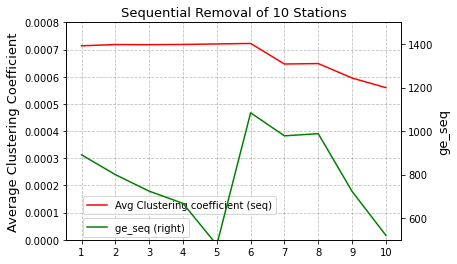

In [1194]:
# plot
ax = df_bet_all["Avg Clustering coefficient (seq)"].plot(
    ylim=(0, 0.000800), color="red"
)
ax2 = df_bet_all["ge_seq"].plot(secondary_y=True, color="green")


ax2.set_ylim(500, 1500)

# legend and grid
ax2.legend(bbox_to_anchor=(0.05, 0.1), loc="upper left", borderaxespad=0)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="upper left", borderaxespad=0)
ax.grid(color="grey", linestyle="--", alpha=0.5)

# labels
ax.set_ylabel("Average Clustering Coefficient", fontsize=13)
ax2.set_ylabel("ge_seq", fontsize=13)
plt.title("Sequential Removal of 10 Stations", fontsize=13)

# x limit
plt.xticks(list(df_bet_all.index))

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.show()

- Critically discuss which closure will have the largest impact on passengers, referring to your measures and results.

- clustering coeff definition is the prob of 2 nodes being connected to a common third? therefore in tube network its an indication of how well they are connected to others as an alternative? since its prob

# Part 2: Spatial Interaction models: 50 marks

## III. Models and calibration: 18


### III.1. Spatial interaction models: 8

- Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.


1. Unconstrained model:meets a constrained on. sometimes called The geographers gravity model 
- k the gravitational constant.
- beta equiv of 2 in the inv
- exponential
- when we add up the model it is equal to T
- k is constant we need to get T total flows
- we do predict both origin and destinations. also not only predict trips but the amount of activity attracted to oi and amounut of activity attracted to dj. never widely used in a prdictive context

- the other memebers of the famility introduce more specific constraints on orig and destinations. because if u have info on the origins where u want to predict the dest and vise versa, or u want to predict the trip knowing orig and dest then u constrain the model



The single constrained models are location models


2. Single Constrained Origin model: retail model: location model
- WE know what origins are so we want to predic the dest. similar to uncons model except ai instead of k. 
- if we r pridciting a journey to work. we know where the work but dont know where they live?check if this is in destination..
- ai makes sure flow estimates of origni sum up to the known flows totals
- often used to model retailing. oi is the pop at a specific zone and j is size of showing centre.. use to predict flow of spending


3. Single Constrained Destination model
- we have a constrained on the destination here. bj value is the destination parameter the makes sure the destination is met.we know whats in the destination 

- (oi and dj are origina and destination activity land use


4. Doubly Constrained Model:
- This is the transportation engineers model becasue in the 4 stage transport planning process (where we start of with trip dest, trip distribution, model split, and trip assignment), it is the distribution model (second stage of the 4 stage planning process).
- tij is what the transport engineer is interested in: the flows where oring and destination are given. the focus is on the pattern of trip distribution, to look at conjestion in networks where focus is not on changing the landuse oi or dj bu the focus is on the distrbution of trips




- combo of the above. we have orig and destinations.
- manipulate tij. 
- Ai to Oi and bj to Dj are reproduced in the model fit
- if we begin to manipulate the model by puttin tij in to the two contraints, we find we can only get ai as a function of bj and we can only get bj as a function of ai. so we need to solve the model by initially guess bj to compute ai, that gives us a new value of ai that can then be used to get ai...this process it computed iterativly...we get an intiirinsiclty non linear equation where we use a method of starting somwhere and the getting it solved

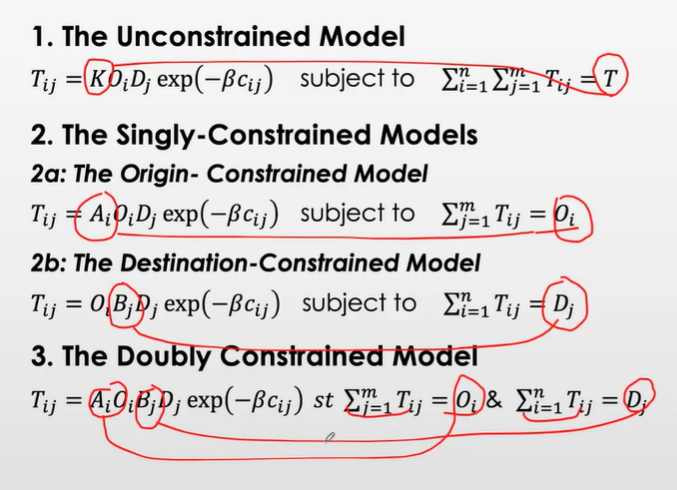


The differences between the 4 models:

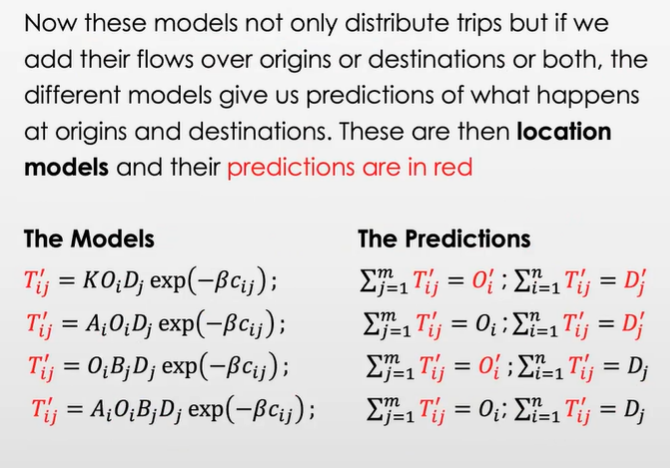


- origin population: alpha
- destination jobs: gamma
- distance as a cost: -beta
- constank k

In [178]:
# import the necessary libraries
from math import sqrt

import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [179]:
# set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r ** 2

    return R2


def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    res = (observed - estimated) ** 2
    RMSE = round(sqrt(res.mean()), 3)

    return RMSE

In [180]:
# read in flows data
london_flows = pd.read_csv("data/london_flows.csv")

In [181]:
london_flows.head()

station_origin station_destination  flows  population   jobs     distance
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097
1     Abbey Road             Beckton      1         599    442  8510.121774
2     Abbey Road           Blackwall      3         599    665  3775.448872
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220
4     Abbey Road        Canning Town     37         599  15428  2228.923167

In [182]:
london_flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [183]:
# now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
london_flows_pivot = pd.pivot_table(
    london_flows,
    values="flows",
    index="station_origin",
    columns="station_destination",
    aggfunc=np.sum,
    margins=True,
)
london_flows_pivot

pd.set_option("display.max_columns", None)
london_flows_pivot


# total flows: 1542391

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             11.0      1.0          1.0      0.0          19.0   
Aldgate                17.0      2.0          0.0      2.0         167.0   
Aldgate East           20.0      4.0          0.0      0.0          45.0   
...                     ...      ...          ...      ...           ...   
Woodford               22.0      2.0          NaN      0.0          14.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          59.0     63.0          NaN      0.0          19.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  8103.0   2193.0        748.0    315.0       14973.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN                0.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      0.0   
Acton Town              0.0               66.0       9.0      1.0   
Aldgate                 0.0                5.0     221.0      0.0   
Aldgate East            2.0               95.0      45.0     15.0   
...                     ...                ...       ...      ...   
Woodford                3.0              317.0      37.0     10.0   
Woodgrange Park         NaN                NaN       NaN     42.0   
Woodside Park           5.0              240.0      12.0      1.0   
Woolwich Arsenal        NaN             1340.0       NaN      NaN   
All                  3814.0            78549.0    9134.0   7004.0   

station_destination  Barkingside  Barons Court  Battersea Park  Bayswater  \
station_origin                                                              
Abbey Road          

### III.2. Calibration of model: 10


- Using the information of population, jobs and flows, select a spatial interaction model and calibrate the parameter beta. Make sure to justify your selection of model.

- i selected D.C.M. 
- I will show it with Inv powe and negative exp
- get rmse and r2 vals

In [184]:
# #subset the dataframe to the flows we want
# london_flows_sub = london_flows[["flows", "distance"]]
# #remove all 0 values (logarithms can't deal with 0 values)
# london_flows_sub = london_flows_sub[(london_flows_sub!=0).all(1)]

# #extract the x and y converting to log
# x = np.log(london_flows_sub["distance"])
# y = np.log(london_flows_sub["flows"])

# #create the subplot
# fig, ax = plt.subplots(figsize = (10,10))
# #plot the results along with the line of best fit
# sns.regplot(x=x, y=y, marker="+", ax=ax)
# ax.set_xlabel("log(Dist)", fontsize = 20)
# ax.set_ylabel("log(flows)", fontsize = 20)

#### first drop value:0's and battersea
- run the doubly constraint using poisson..it calibrates the model 

summary that the Poisson regression has calibrated all 4 parameters for us and these appear under the ‘estimate’ 

We can also see from the other outputs that all variables are highly significant (P>|z| < 0.01), with the z-scores revealing that distance has the most influence on the model (as we might have expected from the scatter plots we produced earlier which showed that distance had by far the strongers correlation with commuting flows).

These parameters are not too far away from our initial guesses of $\alpha$ = 1, $\gamma$ = 1 and $\beta$ = 2, but how do the estimates compare?

One way to calculate the estimates is to plug all of the parameters back into Equation 6 like this:

In [185]:
# # remove all 0 values (logarithms can't deal with 0 values)
# london_flows = london_flows[(london_flows!=0).all(1)]

In [186]:
# pop zero, jobs zeros so batterseapark origin and dest

In [187]:
london_flows[london_flows["station_origin"] == "Battersea Park"]

station_origin     station_destination  flows  population   jobs  \
3795  Battersea Park                Brockley      0           0    468   
3796  Battersea Park            Canada Water      0           0  20443   
3797  Battersea Park     Clapham High Street      0           0   1296   
3798  Battersea Park        Dalston Junction      0           0   1289   
3799  Battersea Park            Denmark Hill      0           0   2612   
3800  Battersea Park             Forest Hill      0           0    608   
3801  Battersea Park         Hackney Central      0           0   2440   
3802  Battersea Park              Haggerston      0           0   1184   
3803  Battersea Park                Homerton      0           0   1998   
3804  Battersea Park          Honor Oak Park      0           0    341   
3805  Battersea Park                  Hoxton      0           0   2181   
3806  Battersea Park               New Cross      0           0   1027   
3807  Battersea Park          New Cross Gate      0           0   1340   
3808  Battersea Park             Peckham Rye      0           0   1070   
3809  Battersea Park     Queens Road Peckham      0           0    747   
3810  Battersea Park             Rotherhithe      0           0    321   
3811  Battersea Park                Shadwell      0           0   7447   
3812  Battersea Park  Shoreditch High Street      0           0   7558   
3813  Battersea Park            Surrey Quays      0           0   1005   
3814  Battersea Park                Sydenham      0           0    515   
3815  Battersea Park         Wandsworth Road      0           0    498   
3816  Battersea Park                 Wapping      0           0   1066   
3817  Battersea Park             Whitechapel      0           0  17633   

          distance  
3795  13201.698809  
3796  10440.366798  
3797   1790.459591  
3798  17192.960480  
3799   5032.444704  
3800  16194.083957  
3801  21027.763711  
3802  16384.952185  
3803  21110.011316  
3804  14936.019983  
3805  15550.373547  
3806  12207.848088  
3807  11972.619152  
3808   6368.031315  
3809   7498.592193  
3810  10875.621280  
3811  12184.955835  
3812  14475.121149  
3813   9890.850567  
3814  17609.188948  
3815   1168.489261  
3816  11326.177642  
3817  13279.299701

In [188]:
# london_flows = london_flows.drop(station_origin="Battersea Park")

london_flows.drop(
    london_flows[london_flows["station_origin"] == "Battersea Park"].index, inplace=True
)

In [189]:
london_flows[london_flows["station_origin"] == "Battersea Park"]

Empty DataFrame
Columns: [station_origin, station_destination, flows, population, jobs, distance]
Index: []

In [190]:
london_flows[london_flows["station_destination"] == "Battersea Park"]

station_origin station_destination  flows  population  jobs  \
7045                 Brockley      Battersea Park      0        2322     0   
8518             Canada Water      Battersea Park      0       27026     0   
11571     Clapham High Street      Battersea Park      0        1500     0   
13687        Dalston Junction      Battersea Park      0        3912     0   
13967            Denmark Hill      Battersea Park      0        1844     0   
19136             Forest Hill      Battersea Park      0        2430     0   
21733         Hackney Central      Battersea Park      0        3370     0   
21906              Haggerston      Battersea Park      0        2049     0   
26650          Honor Oak Park      Battersea Park      0        1750     0   
27435                  Hoxton      Battersea Park      0        1041     0   
35750          New Cross Gate      Battersea Park      0        1702     0   
39816             Peckham Rye      Battersea Park      0        2407     0   
41756     Queens Road Peckham      Battersea Park      0        1932     0   
44790                Shadwell      Battersea Park      0        6741     0   
45367  Shoreditch High Street      Battersea Park      0         930     0   
50644            Surrey Quays      Battersea Park      0        3443     0   
50935                Sydenham      Battersea Park      0        1826     0   
55196         Wandsworth Road      Battersea Park      0         617     0   
55429                 Wapping      Battersea Park      0        1251     0   
59395             Whitechapel      Battersea Park      0       12281     0   

           distance  
7045   13201.698809  
8518   10440.366798  
11571   1790.459591  
13687  17192.960480  
13967   5032.444704  
19136  16194.083957  
21733  21027.763711  
21906  16384.952185  
26650  14936.019983  
27435  15550.373547  
35750  11972.619152  
39816   6368.031315  
41756   7498.592193  
44790  12184.955835  
45367  14475.121149  
50644   9890.850567  
50935  17609.188948  
55196   1168.489261  
55429  11326.177642  
59395  13279.299701

In [191]:
london_flows.drop(
    london_flows[london_flows["station_destination"] == "Battersea Park"].index,
    inplace=True,
)

In [192]:
london_flows[london_flows["distance"] == 0]

station_origin station_destination  flows  population   jobs  \
4985         Blackfriars         Blackfriars      1        6781  10849   
8847        Canary Wharf        Canary Wharf      0       14632  58772   
9444       Cannon Street       Cannon Street      0        3874   4698   
16611  Elephant & Castle   Elephant & Castle      0        9325   6427   
17552             Euston              Euston      0       17796  16800   
17807      Euston Square       Euston Square      0        4926   8093   
18940      Finsbury Park       Finsbury Park      0       24735   6769   
21752    Hackney Central     Hackney Central      0        3370   2440   
21809      Hackney Downs       Hackney Downs      1         843    835   
22242        Hammersmith         Hammersmith      0       11818  18250   
32294          Limehouse           Limehouse     38        5348   2969   
32472   Liverpool Street    Liverpool Street      0       31473  61122   
32755      London Bridge       London Bridge      4       32597  29930   
39328         Paddington          Paddington      5       23381  20198   
44856           Shadwell            Shadwell      1        6741   7447   
45107    Shepherd's Bush     Shepherd's Bush      0       10511   9890   
54895           Victoria            Victoria      0       37517  33251   
56180           Waterloo            Waterloo     58       67372  23466   

       distance  
4985        0.0  
8847        0.0  
9444        0.0  
16611       0.0  
17552       0.0  
17807       0.0  
18940       0.0  
21752       0.0  
21809       0.0  
22242       0.0  
32294       0.0  
32472       0.0  
32755       0.0  
39328       0.0  
44856       0.0  
45107       0.0  
54895       0.0  
56180       0.0

In [193]:
london_flows.drop(london_flows[london_flows["distance"] == 0].index, inplace=True)

In [194]:
london_flows[london_flows["station_destination"] == "Battersea Park"]

Empty DataFrame
Columns: [station_origin, station_destination, flows, population, jobs, distance]
Index: []

In [195]:
london_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61413 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61413 non-null  object 
 1   station_destination  61413 non-null  object 
 2   flows                61413 non-null  int64  
 3   population           61413 non-null  int64  
 4   jobs                 61413 non-null  int64  
 5   distance             61413 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [196]:
# pivot table beore (after emoving battersea, and 0 distance )

# now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
london_flows_pivot = pd.pivot_table(
    london_flows,
    values="flows",
    index="station_origin",
    columns="station_destination",
    aggfunc=np.sum,
    margins=True,
)
london_flows_pivot

pd.set_option("display.max_columns", None)
london_flows_pivot

# original after dropping zero vals and battersea 1542283

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             11.0      1.0          1.0      0.0          19.0   
Aldgate                17.0      2.0          0.0      2.0         167.0   
Aldgate East           20.0      4.0          0.0      0.0          45.0   
...                     ...      ...          ...      ...           ...   
Woodford               22.0      2.0          NaN      0.0          14.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          59.0     63.0          NaN      0.0          19.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  8103.0   2193.0        748.0    315.0       14973.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN                0.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      0.0   
Acton Town              0.0               66.0       9.0      1.0   
Aldgate                 0.0                5.0     221.0      0.0   
Aldgate East            2.0               95.0      45.0     15.0   
...                     ...                ...       ...      ...   
Woodford                3.0              317.0      37.0     10.0   
Woodgrange Park         NaN                NaN       NaN     42.0   
Woodside Park           5.0              240.0      12.0      1.0   
Woolwich Arsenal        NaN             1340.0       NaN      NaN   
All                  3814.0            78549.0    9134.0   7004.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

#### Poisson with inverse power law

In [197]:
# take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    london_flows[f"log_{x}"] = np.log(london_flows[x])
    log_x_vars.append(f"log_{x}")

# create the formula
dbl_form = "flows ~ station_destination + station_origin + log_distance-1"

# run the regression for doubly
doubSim = smf.glm(
    formula=dbl_form, data=london_flows, family=sm.families.Poisson()
).fit()
# let's have a look at it's summary
# print(doubSim.summary())

# beta = -0.845

-0.9096

-0.9096

In [198]:
doubSim.mu

array([ 54.84069422,   2.06192601,   2.69794794, ...,  19.53853697,
       115.29764911,  74.17881454])

In [199]:
# get the estimates.. creates a new field that shows the estimate flows derived from the doubly constrained sim mode
# mu is the mean value...this is easier way to extrat the estimates than the other method
london_flows["doubsimfitted"] = np.round(doubSim.mu)

# here's the matrix (pivot table). shows estimate flows of origin and destination
london_flows_pivot_dc = london_flows.pivot_table(
    values="doubsimfitted",
    index="station_origin",
    columns="station_destination",
    aggfunc=np.sum,
    margins=True,
)


pd.set_option("display.max_columns", None)


london_flows_pivot_dc

# see how the orig and dest constraines almost hold

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     15.0   
Aldgate                     NaN            NaN         2.0      NaN   
Aldgate East                NaN            NaN         2.0     49.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         7.0     31.0   
Woodgrange Park             NaN            6.0         NaN      NaN   
Woodside Park               NaN            NaN         5.0     18.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       346.0          751.0      2198.0   7787.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   15.0         NaN      11.0       1.0      NaN   
Aldgate                      42.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       1.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     33.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                17.0         NaN       3.0       NaN      NaN   
Woolwich Arsenal              NaN        28.0       NaN       NaN      NaN   
All                        7934.0       446.0     741.0     256.0    174.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             17.0      6.0          2.0      1.0          39.0   
Aldgate                19.0      3.0          1.0      0.0          19.0   
Aldgate East           21.0      4.0          1.0      0.0          22.0   
...                     ...      ...          ...      ...           ...   
Woodford               29.0      9.0          NaN      1.0          45.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          22.0     15.0          NaN      1.0          37.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  8109.0   2186.0        750.0    308.0       14973.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               55.0       NaN      NaN   
Acton Central           NaN                NaN       NaN     15.0   
Acton Town             10.0              126.0      17.0     12.0   
Aldgate                 5.0              320.0      36.0      7.0   
Aldgate East            6.0              320.0      37.0      9.0   
...                     ...                ...       ...      ...   
Woodford               15.0              233.0      32.0     39.0   
Woodgrange Park         NaN                NaN       NaN    130.0   
Woodside Park          10.0              138.0      21.0     14.0   
Woolwich Arsenal        NaN             1131.0       NaN      NaN   
All                  3821.0            78547.0    9134.0   7006.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

In [200]:
# r2 of the doubly constrained: very high which is good.higher than both single constrained as well.
CalcRSqaured(london_flows["flows"], london_flows["doubsimfitted"])
# increased from last week. good model fit in the 'linear' sense

0.4076853229296076

In [201]:
CalcRMSE(london_flows["flows"], london_flows["doubsimfitted"])
# drastically reduced from last week

101.335

#### Poisson with negative exponential 

In [202]:
# so we dont log the distace is negative exponential

# create the formula
dbl_form_exp = "flows ~ station_destination + station_origin + distance-1"

# run the regression for doubly
doubSim_exp = smf.glm(
    formula=dbl_form_exp, data=london_flows, family=sm.families.Poisson()
).fit()
# let's have a look at it's summary
# print(doubSim_exp.summary())

# beta =  -0.8474

In [203]:
beta = doubSim_exp.params[-1]
beta

-0.0001543696921564879

In [204]:
# get the predicted flows to and round to whole numbers
london_flows["doubsimfitted_exp"] = np.round(doubSim_exp.mu, 0)

# here's the matrix (pivot table). shows estimate flows of origin and destination
london_flows_pivot_dc_exp = london_flows.pivot_table(
    values="doubsimfitted_exp",
    index="station_origin",
    columns="station_destination",
    aggfunc=np.sum,
    margins=True,
)
london_flows_pivot_dc_exp

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     11.0   
Aldgate                     NaN            NaN         1.0      NaN   
Aldgate East                NaN            NaN         2.0     38.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0     38.0   
Woodgrange Park             NaN            2.0         NaN      NaN   
Woodside Park               NaN            NaN         2.0     17.0   
Woolwich Arsenal           28.0            NaN         NaN      NaN   
All                       344.0          750.0      2204.0   7777.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   10.0         NaN      17.0       0.0      NaN   
Aldgate                      32.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     44.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                15.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN        29.0       NaN       NaN      NaN   
All                        7934.0       442.0     739.0     249.0    175.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             12.0      4.0          1.0      0.0          39.0   
Aldgate                23.0      4.0          1.0      1.0          26.0   
Aldgate East           24.0      4.0          1.0      1.0          27.0   
...                     ...      ...          ...      ...           ...   
Woodford               25.0      5.0          NaN      1.0          29.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          25.0     31.0          NaN      1.0          38.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  8096.0   2198.0        742.0    313.0       14976.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               77.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      3.0   
Acton Town              7.0              102.0      11.0      2.0   
Aldgate                 7.0              259.0      33.0      8.0   
Aldgate East            7.0              273.0      34.0     11.0   
...                     ...                ...       ...      ...   
Woodford                7.0              278.0      36.0     52.0   
Woodgrange Park         NaN                NaN       NaN    183.0   
Woodside Park           5.0              136.0      23.0      4.0   
Woolwich Arsenal        NaN              860.0       NaN      NaN   
All                  3812.0            78558.0    9134.0   6997.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

In [205]:
# r2 of the doubly constrained: very high which is good.higher than both single constrained as well.
CalcRSqaured(london_flows["flows"], london_flows["doubsimfitted_exp"])
# increased from last week. good model fit in the 'linear' sense

0.49784274146323154

In [206]:
CalcRMSE(london_flows["flows"], london_flows["doubsimfitted_exp"])
# drastically reduced from last week

93.401

- we can see negative eponenet give as higher r2 value. but is this more suitable for underground? research this
- maybe you could say that distance in the tube network isnt usually the biggest issue, therefore there is no rapid distance decay effect. the observed flows of people wouldnt drop rapidly as people take the tube network but rather other factors like ease of movement, number of transits needed effect trips more

## IV. Scenarios: 30




### IV.1. Scenario A: 8


- assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter beta, compute the new flows for scenario A. Make sure the number of commuters is conserved.


- here we will use production (origin) constraint since origin is fixed and destination jobs change. 

#### Unchanged production model
- we will need to later use the beta from before, and get a new gamma

#### inverse

In [207]:
# create the formula 

formula = "flows ~ station_origin + log_jobs + log_distance-1"


prodSim = smf.glm(
    formula=formula, data=london_flows, family=sm.families.Poisson()
).fit()





The $\gamma$ parameter related to the destination attractiveness:  0.7256

The $\beta$ distance decay parameter: 0.0001. Recall the negative sign in the equation.

We can see from the standard outputs from the model that all of the explanatory variables are statistically significant (P>|z| < 0.01)  And then we have a series of paramaters which are the vector of $\alpha_i$ values associated with our origin constraints.

In [209]:
# extract the coefficients from the model

alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [210]:
# double check tehy r indexed correctly
# gamma #jobs
beta  # dist
# alpha_i  #origin

0.8781191183724356

In [211]:
london_flows["prodSim"] = np.round(prodSim.mu)

In [212]:
CalcRSqaured(london_flows["flows"], london_flows["prodSim"])

0.3882763950178635

In [213]:
CalcRMSE(london_flows["flows"], london_flows["prodSim"])

102.893

#### exponential

In [214]:
# exponenetial version
formula = "flows ~ station_origin + log_jobs + distance-1"


prodSim_exp = smf.glm(
    formula=formula, data=london_flows, family=sm.families.Poisson()
).fit()


# let's have a look at it's summary
# print(prodSim.summary())

In [215]:
alpha_i = prodSim_exp.params[0:-2]
gamma = prodSim_exp.params[-2]
beta = -prodSim_exp.params[-1]

In [216]:
# double check tehy r indexed correctly
# gamma #jobs
beta  # dist
# alpha_i  #origin

0.0001531661934626985

In [217]:
london_flows["prodSim_exp"] = np.round(prodSim_exp.mu)

In [218]:
CalcRSqaured(london_flows["flows"], london_flows["prodSim_exp"])

0.46806484435427537

In [219]:
CalcRMSE(london_flows["flows"], london_flows["prodSim_exp"])

96.263

In [220]:
london_flows.head()

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  
0     55.0         78.0  
1      1.0          1.0  
2      3.0          4.0  
3     66.0         99.0  
4     49.0         56.0

In [221]:
# get sum of flows from each origin code oi to all the other destinations. rename the total flows as "O_i" then merge back in to model
O_i = pd.DataFrame(london_flows.groupby(["station_origin"])["flows"].agg(np.sum))
# total flows out of origin renamed as "O_i"
O_i.rename(columns={"flows": "O_i"}, inplace=True)
# merge back in to our original dataset
london_flows = london_flows.merge(O_i, on="station_origin", how="left")

# this will be used in the task to complete section
D_j = pd.DataFrame(london_flows.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows": "D_j"}, inplace=True)
london_flows = london_flows.merge(D_j, on="station_destination", how="left")

london_flows.head()

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  O_i    D_j  
0     55.0         78.0  599  78549  
1      1.0          1.0  599    442  
2      3.0          4.0  599    665  
3     66.0         99.0  599  58772  
4     49.0         56.0  599  15428

In [222]:


# get all the coefficients from the model produced earlier (see them in summary table)
coefs = pd.DataFrame(prodSim_exp.params)
# reset their index to have in right order
coefs.reset_index(inplace=True)
# rename columns index (the origCode) and 0 to coefficient
coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)

coefs.head()

coef   alpha_i
0     station_origin[Abbey Road] -2.914322
1  station_origin[Acton Central] -1.162092
2     station_origin[Acton Town] -1.613081
3        station_origin[Aldgate] -2.943047
4   station_origin[Aldgate East] -2.854752

In [223]:
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")

# then once you have done this you can join them back into the dataframes
london_flows = london_flows.merge(
    coefs, left_on="station_origin", right_on="coef", how="left"
)
london_flows.drop(columns=["coef"], inplace=True)
# check this has worked
london_flows.head()

/tmp/ipykernel_552/3726886032.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  
0     55.0         78.0  599  78549 -2.914322  
1      1.0          1.0  599    442 -2.914322  
2      3.0          4.0  599    665 -2.914322  
3     66.0         99.0  599  58772 -2.914322  
4     49.0         56.0  599  15428 -2.914322

In [224]:
# now plug everything back into the Equation model for exponential  ...
london_flows["prodsimest_inv"] = np.exp(
    london_flows["alpha_i"]
    + gamma * london_flows["log_jobs"]
    - beta * london_flows["distance"]
)  # not logged since its neg exponenetail


london_flows.head(10)

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   
5     Abbey Road        Crossharbour      1         599   1208  6686.475560   
6     Abbey Road        Custom House      0         599    845  3824.855630   
7     Abbey Road          Cutty Sark      2         599   1748  8503.898909   
8     Abbey Road              Cyprus      7         599    850  6532.099618   
9     Abbey Road         Devons Road      1         599    611  3958.324171   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   
5        6.395262   7.096721      8.807842            3.0                5.0   
6        6.395262   6.739337      8.249276            4.0                5.0   
7        6.395262   7.466228      9.048280            5.0                6.0   
8        6.395262   6.745236      8.784484            4.0                5.0   
9        6.395262   6.415097      8.283576            3.0                4.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  
0     55.0         78.0  599  78549 -2.914322       77.685360  
1      1.0          1.0  599    442 -2.914322        1.465951  
2      3.0          4.0  599    665 -2.914322        4.121373  
3     66.0         99.0  599  58772 -2.914322       99.484532  
4     49.0         56.0  599  15428 -2.914322       56.125688  
5      3.0          4.0  599   1208 -2.914322        4.141812  
6      3.0          5.0  599    845 -2.914322        4.901455  
7      3.0          4.0  599   1748 -2.914322        4.144676  
8      2.0          3.0  599    850 -2.914322        3.252193  
9      2.0          4.0  599    611 -2.914322        3.759238

In [225]:
# get the predicted flows to and round to whole numbers
london_flows["prodsimest_inv"] = np.round(prodSim_exp.mu, 0)

# here's the matrix (pivot table). shows estimate flows of origin and destination
london_flows_pivot_pc_inv = london_flows.pivot_table(
    values="prodsimest_inv",
    index="station_origin",
    columns="station_destination",
    aggfunc=np.sum,
    margins=True,
)
london_flows_pivot_pc_inv


#1541347.0

1541347.0

In [226]:
CalcRSqaured(london_flows["flows"], london_flows["prodsimest_inv"])
# increased from last week. good model fit in the 'linear' sense

0.46806484435427537

In [227]:
CalcRMSE(london_flows["flows"], london_flows["prodsimest_inv"])
# drastically reduced from last week

96.263

#### CHANGED production model


In [228]:
london_flows.head(5)

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  
0     55.0         78.0  599  78549 -2.914322            78.0  
1      1.0          1.0  599    442 -2.914322             1.0  
2      3.0          4.0  599    665 -2.914322             4.0  
3     66.0         99.0  599  58772 -2.914322            99.0  
4     49.0         56.0  599  15428 -2.914322            56.0

In [229]:
# creating a function for new jobs
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = 0.5 * row["jobs"]
    else:
        val = row["jobs"]
    return val


london_flows["jobs_sa"] = london_flows.apply(new_jobs, axis=1)
pd.set_option("display.max_columns", None)

london_flows.head(10)

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   
5     Abbey Road        Crossharbour      1         599   1208  6686.475560   
6     Abbey Road        Custom House      0         599    845  3824.855630   
7     Abbey Road          Cutty Sark      2         599   1748  8503.898909   
8     Abbey Road              Cyprus      7         599    850  6532.099618   
9     Abbey Road         Devons Road      1         599    611  3958.324171   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   
5        6.395262   7.096721      8.807842            3.0                5.0   
6        6.395262   6.739337      8.249276            4.0                5.0   
7        6.395262   7.466228      9.048280            5.0                6.0   
8        6.395262   6.745236      8.784484            4.0                5.0   
9        6.395262   6.415097      8.283576            3.0                4.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  jobs_sa  
0     55.0         78.0  599  78549 -2.914322            78.0  78549.0  
1      1.0          1.0  599    442 -2.914322             1.0    442.0  
2      3.0          4.0  599    665 -2.914322             4.0    665.0  
3     66.0         99.0  599  58772 -2.914322            99.0  29386.0  
4     49.0         56.0  599  15428 -2.914322            56.0  15428.0  
5      3.0          4.0  599   1208 -2.914322             4.0   1208.0  
6      3.0          5.0  599    845 -2.914322             5.0    845.0  
7      3.0          4.0  599   1748 -2.914322             4.0   1748.0  
8      2.0          3.0  599    850 -2.914322             3.0    850.0  
9      2.0          4.0  599    611 -2.914322             4.0    611.0

In [294]:
# calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = london_flows["jobs_sa"] ** gamma

dist_beta = np.exp(london_flows["distance"] * -beta)


# calcualte the first stage of the Ai values
london_flows["Ai1"] = Dj3_gamma * dist_beta
# now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["station_origin"])["Ai1"].agg(np.sum))
# now divide into 1
A_i["Ai1"] = 1 / A_i["Ai1"]
A_i.rename(columns={"Ai1": "A_i2"}, inplace=True)
# and write the A_i values back into the dataframe
london_flows = london_flows.merge(
    A_i, left_on="station_origin", right_index=True, how="left"
)

In [295]:
pd.set_option("display.max_columns", None)
london_flows.head()

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  jobs_sa  \
0     55.0         78.0  599  78549 -2.914322            78.0  78549.0   
1      1.0          1.0  599    442 -2.914322             1.0    442.0   
2      3.0          4.0  599    665 -2.914322             4.0    665.0   
3     66.0         99.0  599  58772 -2.914322            99.0  29386.0   
4     49.0         56.0  599  15428 -2.914322            56.0  15428.0   

           Ai1   A_i2_x  prodsimest4    A_i2_y  
0  1432.231104  0.00005        148.0  0.000097  
1    27.026714  0.00005          3.0  0.000097  
2    75.982904  0.00005          4.0  0.000097  
3  1086.638601  0.00005         70.0  0.000097  
4  1034.750388  0.00005         43.0  0.000097

In [299]:
# to check everything works, recreate the original estimates
london_flows["prodsimest4"] = (
    london_flows["A_i2_y"] * london_flows["O_i"] * Dj3_gamma * dist_beta
)
# round
london_flows["prodsimest4"] = round(london_flows["prodsimest4"])

In [300]:
cdatasubmat5 = london_flows.pivot_table(
    values="prodsimest4",
    index="station_origin",
    columns="station_destination",
    aggfunc=np.sum,
    margins=True,
)

pd.set_option("display.max_columns", None)

cdatasubmat5

# 1542413.0

# exp()  prodsimest4

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     13.0   
Aldgate                     NaN            NaN         1.0      NaN   
Aldgate East                NaN            NaN         1.0     41.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         1.0     42.0   
Woodgrange Park             NaN            1.0         NaN      NaN   
Woodside Park               NaN            NaN         2.0     19.0   
Woolwich Arsenal           36.0            NaN         NaN      NaN   
All                       411.0          359.0      2172.0   8638.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   13.0         NaN      14.0       0.0      NaN   
Aldgate                      38.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     53.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                19.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN        39.0       NaN       NaN      NaN   
All                        9612.0       578.0     621.0     167.0    170.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             16.0      4.0          1.0      1.0          45.0   
Aldgate                28.0      4.0          1.0      1.0          27.0   
Aldgate East           29.0      4.0          1.0      1.0          29.0   
...                     ...      ...          ...      ...           ...   
Woodford               31.0      5.0          NaN      2.0          31.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          32.0     32.0          NaN      2.0          41.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  9965.0   2233.0        560.0    673.0       16109.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               83.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      3.0   
Acton Town              6.0               93.0      15.0      2.0   
Aldgate                 5.0              213.0      39.0      6.0   
Aldgate East            6.0              225.0      41.0      8.0   
...                     ...                ...       ...      ...   
Woodford                6.0              232.0      44.0     37.0   
Woodgrange Park         NaN                NaN       NaN    213.0   
Woodside Park           4.0              118.0      29.0      3.0   
Woolwich Arsenal        NaN              990.0       NaN      NaN   
All                  3043.0            70019.0   11338.0   5584.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

In [ ]:
# #now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
# london_flows_pivot = pd.pivot_table(london_flows, values ="flows", index="station_origin", columns = "station_destination",
#                             aggfunc=np.sum, margins=True)
# london_flows_pivot

# #total flows: 1542391

In [301]:
london_flows.head()

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  jobs_sa  \
0     55.0         78.0  599  78549 -2.914322            78.0  78549.0   
1      1.0          1.0  599    442 -2.914322             1.0    442.0   
2      3.0          4.0  599    665 -2.914322             4.0    665.0   
3     66.0         99.0  599  58772 -2.914322            99.0  29386.0   
4     49.0         56.0  599  15428 -2.914322            56.0  15428.0   

           Ai1   A_i2_x  prodsimest4    A_i2_y  
0  1432.231104  0.00005         83.0  0.000097  
1    27.026714  0.00005          2.0  0.000097  
2    75.982904  0.00005          4.0  0.000097  
3  1086.638601  0.00005         63.0  0.000097  
4  1034.750388  0.00005         60.0  0.000097

In [302]:
# plot for the SA
diff_sa = london_flows.groupby("station_origin", as_index=False).agg(
    {"flows": "sum", "prodsimest4": "sum"}
)
diff_sa["diff"] = (
    diff_sa["prodsimest4"] - diff_sa["flows"]
)  # prodsimest_inv is the unchanged          #prodsimest_inv

diff_sa["diff_abs"] = abs(diff_sa["diff"])
diff_sa.sort_values(by=["diff_abs"], ascending=False, inplace=True)
diff_sa = diff_sa.head(31)
diff_sa

station_origin  flows  prodsimest4  diff  diff_abs
224             Mile End   7145       7129.0 -16.0      16.0
205     Leicester Square    985        969.0 -16.0      16.0
254        Parsons Green   4361       4345.0 -16.0      16.0
16              Barbican   1239       1224.0 -15.0      15.0
71        Clapham Common   4909       4895.0 -14.0      14.0
334               Temple    349        335.0 -14.0      14.0
180     Hyde Park Corner    259        246.0 -13.0      13.0
160  Heathrow Terminal 5    938        925.0 -13.0      13.0
188           Kensington    432        420.0 -12.0      12.0
189         Kentish Town   2414       2402.0 -12.0      12.0
374             West Ham   8879       8867.0 -12.0      12.0
25            Bermondsey   5102       5090.0 -12.0      12.0
162       Hendon Central   4059       4047.0 -12.0      12.0
64         Charing Cross   6491       6479.0 -12.0      12.0
31               Borough   1346       1334.0 -12.0      12.0
288       Russell Square   1509       1497.0 -12.0      12.0
126      Fulham Broadway   3289       3277.0 -12.0      12.0
261             Plaistow   3634       3622.0 -12.0      12.0
192          Kew Gardens   2241       2229.0 -12.0      12.0
381      Westbourne Park   2416       2405.0 -11.0      11.0
297        Sloane Square   4957       4946.0 -11.0      11.0
221          Marble Arch   1808       1797.0 -11.0      11.0
220        Mansion House    516        505.0 -11.0      11.0
13          Baker Street   7444       7433.0 -11.0      11.0
63         Chancery Lane   1148       1137.0 -11.0      11.0
258    Piccadilly Circus   1037       1026.0 -11.0      11.0
107         Edgware Road   2841       2831.0 -10.0      10.0
277             Richmond   5157       5147.0 -10.0      10.0
9                  Angel   4199       4189.0 -10.0      10.0
371        West Brompton   3831       3821.0 -10.0      10.0
253           Park Royal    559        549.0 -10.0      10.0

In [245]:
diff_sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 180 to 27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   station_origin  31 non-null     object 
 1   flows           31 non-null     int64  
 2   prodsimest4     31 non-null     float64
 3   diff            31 non-null     float64
 4   diff_abs        31 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ KB


#### before brexit

In [382]:
# plot for the SA
diff_sa1 = london_flows.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimest4": "sum"}
)
diff_sa1["diff"] = diff_sa1["prodsimest4"] - diff_sa1["flows"]
diff_sa1["diff_abs"] = abs(diff_sa1["diff"])

diff_sa1.sort_values(by=["flows"], ascending=False, inplace=True)
diff_sa1 = diff_sa1.head(40)
diff_sa1

station_destination  flows  prodsimest4     diff  diff_abs
15          Bank and Monument  78549      70019.0  -8530.0    8530.0
212          Liverpool Street  61122      59369.0  -1753.0    1753.0
54               Canary Wharf  58772      29489.0 -29283.0   29283.0
326                 Stratford  55954      67147.0  11193.0   11193.0
251             Oxford Circus  44368      40062.0  -4306.0    4306.0
197  King's Cross St. Pancras  33330      30803.0  -2527.0    2527.0
355                  Victoria  33251      28939.0  -4312.0    4312.0
213             London Bridge  29926      27425.0  -2501.0    2501.0
138                Green Park  26754      26737.0    -17.0      17.0
119                Farringdon  25592      24407.0  -1185.0    1185.0
167      Highbury & Islington  25385      29978.0   4593.0    4593.0
227                  Moorgate  24574      24788.0    214.0     214.0
364                  Waterloo  23408      22536.0   -872.0     872.0
170                   Holborn  22346      23667.0   1321.0    1321.0
30                Bond Street  20967      21796.0    829.0     829.0
53               Canada Water  20443      25343.0   4900.0    4900.0
252                Paddington  20193      17207.0  -2986.0    2986.0
339      Tottenham Court Road  19126      21092.0   1966.0    1966.0
147               Hammersmith  18250      13071.0  -5179.0    5179.0
386               Whitechapel  17633      24447.0   6814.0    6814.0
362             Warren Street  17309      18999.0   1690.0    1690.0
116                    Euston  16800      18250.0   1450.0    1450.0
354                  Vauxhall  16242      13853.0  -2389.0    2389.0
248                Old Street  15897      16580.0    683.0     683.0
383               Westminster  15466      17469.0   2003.0    2003.0
55               Canning Town  15428      17258.0   1830.0    1830.0
63              Chancery Lane  15391      17147.0   1756.0    1756.0
303          South Kensington  15325      14854.0   -471.0     471.0
13               Baker Street  14973      16109.0   1136.0    1136.0
258         Piccadilly Circus  13641      16368.0   2727.0    2727.0
317                St. Paul's  13446      15326.0   1880.0    1880.0
315          St. James's Park  13339      15048.0   1709.0    1709.0
27                Blackfriars  10848      12570.0   1722.0    1722.0
313                 Southwark  10326      12681.0   2355.0    2355.0
112                Embankment  10220      13227.0   3007.0    3007.0
290             Seven Sisters  10191      10289.0     98.0      98.0
293           Shepherd's Bush   9890      10750.0    860.0     860.0
16                   Barbican   9134      11338.0   2204.0    2204.0
205          Leicester Square   8847      11818.0   2971.0    2971.0
343                Tower Hill   8286      10233.0   1947.0    1947.0

In [304]:
# check sums: this was calculated before sorting on top 40
Total = diff_sa1["flows"].sum()
print(Total)

920942


In [305]:
# check sums
Total = diff_sa1["prodsimest4"].sum()
print(Total)


918489.0


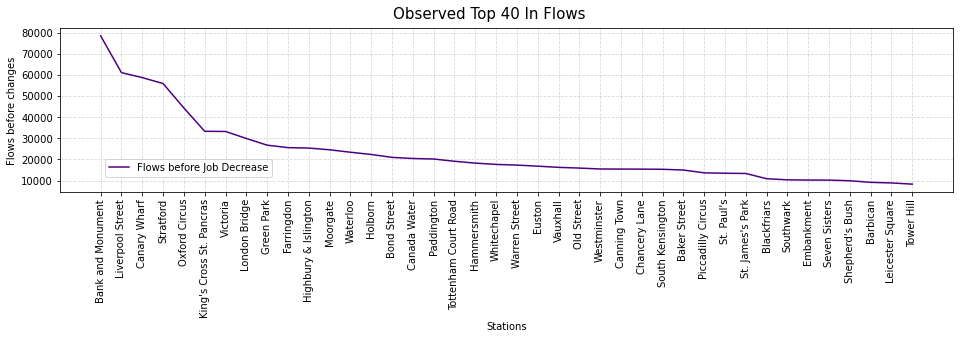

In [388]:
# plot top 40 flows before

fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Observed Top 40 In Flows ", fontsize=15
)  # Decrease in Canary Wharf's jobs

ax.plot(list(diff_sa1["flows"])[0:], color="indigo", label="Flows before Job Decrease")


# plot
ax.grid(color="grey", linestyle="--", alpha=0.3)
ax.set_xlabel("Stations")
ax.set_ylabel("Flows before changes")
ax.set_xticks(list(range(40)))
ax.set_xticklabels(list(diff_sa1["station_destination"])[0:40], rotation=90)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="upper left", borderaxespad=0)
plt.show()

#### flows after brexit

In [380]:
# plot for flows after brexi
diff_sa2 = london_flows.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimest4": "sum"}
)
diff_sa2["diff"] = diff_sa2["prodsimest4"] - diff_sa2["flows"]

diff_sa2["diff_abs"] = abs(diff_sa2["diff"])

diff_sa2.sort_values(by=["prodsimest4"], ascending=False, inplace=True)
diff_sa2 = diff_sa2.head(40)
diff_sa2

station_destination  flows  prodsimest4     diff  diff_abs
15          Bank and Monument  78549      70019.0  -8530.0    8530.0
326                 Stratford  55954      67147.0  11193.0   11193.0
212          Liverpool Street  61122      59369.0  -1753.0    1753.0
251             Oxford Circus  44368      40062.0  -4306.0    4306.0
197  King's Cross St. Pancras  33330      30803.0  -2527.0    2527.0
167      Highbury & Islington  25385      29978.0   4593.0    4593.0
54               Canary Wharf  58772      29489.0 -29283.0   29283.0
355                  Victoria  33251      28939.0  -4312.0    4312.0
213             London Bridge  29926      27425.0  -2501.0    2501.0
138                Green Park  26754      26737.0    -17.0      17.0
53               Canada Water  20443      25343.0   4900.0    4900.0
227                  Moorgate  24574      24788.0    214.0     214.0
386               Whitechapel  17633      24447.0   6814.0    6814.0
119                Farringdon  25592      24407.0  -1185.0    1185.0
170                   Holborn  22346      23667.0   1321.0    1321.0
364                  Waterloo  23408      22536.0   -872.0     872.0
30                Bond Street  20967      21796.0    829.0     829.0
339      Tottenham Court Road  19126      21092.0   1966.0    1966.0
362             Warren Street  17309      18999.0   1690.0    1690.0
116                    Euston  16800      18250.0   1450.0    1450.0
383               Westminster  15466      17469.0   2003.0    2003.0
55               Canning Town  15428      17258.0   1830.0    1830.0
252                Paddington  20193      17207.0  -2986.0    2986.0
63              Chancery Lane  15391      17147.0   1756.0    1756.0
248                Old Street  15897      16580.0    683.0     683.0
258         Piccadilly Circus  13641      16368.0   2727.0    2727.0
13               Baker Street  14973      16109.0   1136.0    1136.0
317                St. Paul's  13446      15326.0   1880.0    1880.0
315          St. James's Park  13339      15048.0   1709.0    1709.0
303          South Kensington  15325      14854.0   -471.0     471.0
354                  Vauxhall  16242      13853.0  -2389.0    2389.0
112                Embankment  10220      13227.0   3007.0    3007.0
147               Hammersmith  18250      13071.0  -5179.0    5179.0
313                 Southwark  10326      12681.0   2355.0    2355.0
27                Blackfriars  10848      12570.0   1722.0    1722.0
205          Leicester Square   8847      11818.0   2971.0    2971.0
16                   Barbican   9134      11338.0   2204.0    2204.0
293           Shepherd's Bush   9890      10750.0    860.0     860.0
290             Seven Sisters  10191      10289.0     98.0      98.0
343                Tower Hill   8286      10233.0   1947.0    1947.0

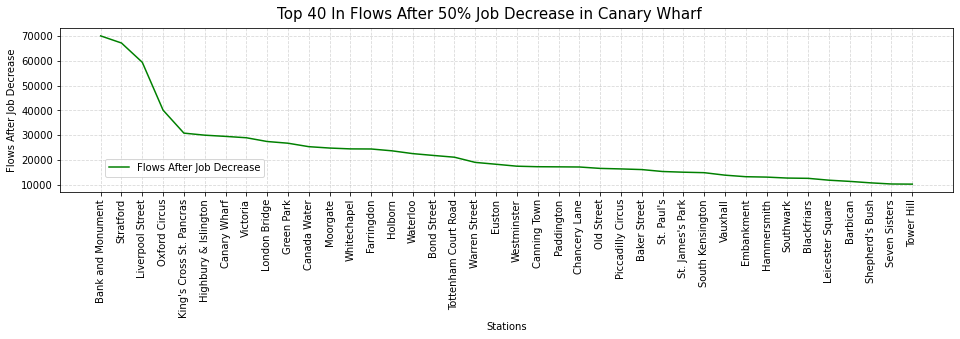

In [381]:
# plot top 40 after

fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Top 40 In Flows After 50% Job Decrease in Canary Wharf ", fontsize=15
)  

ax.plot(
    list(diff_sa2["prodsimest4"])[0:], color="green", label="Flows After Job Decrease"
)

ax.grid(color="grey", linestyle="--", alpha=0.3)
ax.set_xlabel("Stations")
ax.set_ylabel("Flows After Job Decrease")
ax.set_xticks(list(range(40)))
ax.set_xticklabels(list(diff_sa2["station_destination"])[0:40], rotation=90)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="upper left", borderaxespad=0)
plt.show()

#### top 40 changes in flows

In [309]:
#plot largest changes
diff_sa3 = london_flows.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimest4": "sum"}
)
diff_sa3["diff"] = diff_sa3["prodsimest4"] - diff_sa3["flows"]

diff_sa3["diff_abs"] = abs(diff_sa3["diff"])

diff_sa3.sort_values(by=["diff_abs"], ascending=False, inplace=True)
diff_sa3 = diff_sa3.head(40)
diff_sa3

station_destination  flows  prodsimest4     diff  diff_abs
54               Canary Wharf  58772      29489.0 -29283.0   29283.0
326                 Stratford  55954      67147.0  11193.0   11193.0
15          Bank and Monument  78549      70019.0  -8530.0    8530.0
386               Whitechapel  17633      24447.0   6814.0    6814.0
147               Hammersmith  18250      13071.0  -5179.0    5179.0
53               Canada Water  20443      25343.0   4900.0    4900.0
167      Highbury & Islington  25385      29978.0   4593.0    4593.0
355                  Victoria  33251      28939.0  -4312.0    4312.0
251             Oxford Circus  44368      40062.0  -4306.0    4306.0
389                 Wimbledon   6295       1999.0  -4296.0    4296.0
73           Clapham Junction   4969       1567.0  -3402.0    3402.0
397          Woolwich Arsenal   4428       1167.0  -3261.0    3261.0
353                  Uxbridge   4316       1287.0  -3029.0    3029.0
112                Embankment  10220      13227.0   3007.0    3007.0
252                Paddington  20193      17207.0  -2986.0    2986.0
205          Leicester Square   8847      11818.0   2971.0    2971.0
64              Charing Cross   7016       9841.0   2825.0    2825.0
277                  Richmond   5397       2620.0  -2777.0    2777.0
295    Shoreditch High Street   7558       4787.0  -2771.0    2771.0
258         Piccadilly Circus  13641      16368.0   2727.0    2727.0
374                  West Ham   5487       8102.0   2615.0    2615.0
26              Bethnal Green   4660       7245.0   2585.0    2585.0
197  King's Cross St. Pancras  33330      30803.0  -2527.0    2527.0
213             London Bridge  29926      27425.0  -2501.0    2501.0
80              Covent Garden   4355       6790.0   2435.0    2435.0
288            Russell Square   5172       7584.0   2412.0    2412.0
354                  Vauxhall  16242      13853.0  -2389.0    2389.0
371             West Brompton   5859       8216.0   2357.0    2357.0
313                 Southwark  10326      12681.0   2355.0    2355.0
334                    Temple   6780       8985.0   2205.0    2205.0
16                   Barbican   9134      11338.0   2204.0    2204.0
56              Cannon Street   4698       6729.0   2031.0    2031.0
383               Westminster  15466      17469.0   2003.0    2003.0
339      Tottenham Court Road  19126      21092.0   1966.0    1966.0
133             Goodge Street   6457       8417.0   1960.0    1960.0
163               Heron Quays   5975       4027.0  -1948.0    1948.0
343                Tower Hill   8286      10233.0   1947.0    1947.0
109         Elephant & Castle   6427       8352.0   1925.0    1925.0
317                St. Paul's  13446      15326.0   1880.0    1880.0
9                       Angel   8103       9965.0   1862.0    1862.0

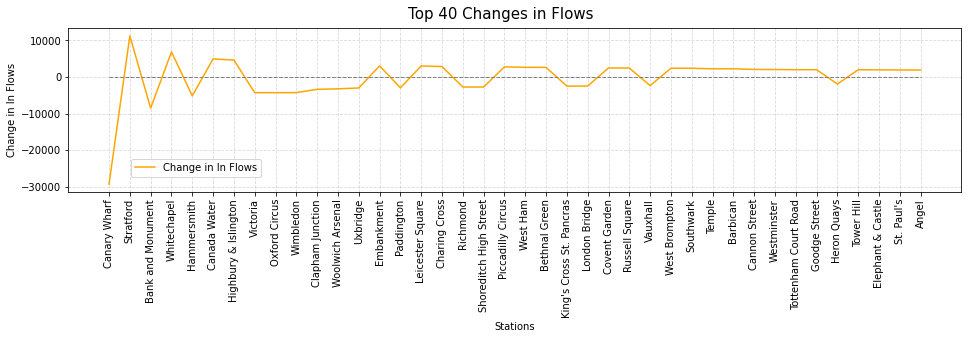

In [310]:
# plot for the SA
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle("Top 40 Changes in Flows", fontsize=15)  


ax.plot(list(diff_sa3["diff"])[0:], color="orange", label="Change in In Flows")
ax.plot([0] * 40, color="grey", linestyle="--", linewidth=1)

ax.grid(color="grey", linestyle="--", alpha=0.3)
ax.set_xlabel("Stations")
ax.set_ylabel("Change in In Flows")
ax.set_xticks(list(range(40)))
ax.set_xticklabels(list(diff_sa3["station_destination"])[0:40], rotation=90)
ax.legend(bbox_to_anchor=(0.07, 0.2), loc="upper left", borderaxespad=0)

plt.show()

Here it is very easy to see the Origin Constrained working. The sum across all destinations for each origin in the estimated matrix is exactly the same sum (give or take 1 or 2) across the observed matrics - $\sum_j T_{ij} = \sum_j \lambda_{ij} = O_i$, but clearly, the same is not true when you sum across all origins for each destination - $\sum_i T_{ij} \neq \sum_i \lambda_{ij} \neq D_j$

## IV.2. Scenario B: 12

IV.2. Scenario B: assume that there is a significant increase in the cost of transport. Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

In [311]:
london_flows.head()

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  jobs_sa  \
0     55.0         78.0  599  78549 -2.914322            78.0  78549.0   
1      1.0          1.0  599    442 -2.914322             1.0    442.0   
2      3.0          4.0  599    665 -2.914322             4.0    665.0   
3     66.0         99.0  599  58772 -2.914322            99.0  29386.0   
4     49.0         56.0  599  15428 -2.914322            56.0  15428.0   

           Ai1   A_i2_x  prodsimest4    A_i2_y  
0  1432.231104  0.00005         83.0  0.000097  
1    27.026714  0.00005          2.0  0.000097  
2    75.982904  0.00005          4.0  0.000097  
3  1086.638601  0.00005         63.0  0.000097  
4  1034.750388  0.00005         60.0  0.000097

In [90]:
# london_flows= london_flows.drop( columns = ["Ai1", "A_i2_y", "A_i2_x"])  #""unconest", "prodsimest1", "alpha_i"   # "A_i1", "A_i2_x","Ai2"

In [312]:
london_flows.head(1)

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  jobs_sa  \
0     55.0         78.0  599  78549 -2.914322            78.0  78549.0   

           Ai1   A_i2_x  prodsimest4    A_i2_y  
0  1432.231104  0.00005         83.0  0.000097

In [313]:
london_flows2 = london_flows.copy()

In [314]:
beta1 = beta * 10
beta2 = beta * 100

In [315]:
dj_gamma2 = london_flows2["jobs"] ** gamma  # use old jobs

# beta = 1
dist_beta1 = np.exp(london_flows2["distance"] * -beta1)
london_flows2["Ai1_sb"] = dj_gamma2 * dist_beta1
A_i = pd.DataFrame(london_flows2.groupby(["station_origin"])["Ai1_sb"].agg(np.sum))
A_i["Ai1_sb"] = 1 / A_i["Ai1_sb"]
A_i.rename(columns={"Ai1_sb": "A_i1_sb"}, inplace=True)
london_flows2 = london_flows2.merge(
    A_i, left_on="station_origin", right_index=True, how="left"
)


# beta = 2
dist_beta2 = np.exp(london_flows2["distance"] * -beta2)
london_flows2["Ai2_sb"] = dj_gamma2 * dist_beta2
A_i2 = pd.DataFrame(london_flows2.groupby(["station_origin"])["Ai2_sb"].agg(np.sum))
A_i2["Ai2_sb"] = 1 / A_i2["Ai2_sb"]
A_i2.rename(columns={"Ai2_sb": "A_i2_sb"}, inplace=True)
london_flows2 = london_flows2.merge(
    A_i2, left_on="station_origin", right_index=True, how="left"
)

In [316]:
london_flows2.head()

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  jobs_sa  \
0     55.0         78.0  599  78549 -2.914322            78.0  78549.0   
1      1.0          1.0  599    442 -2.914322             1.0    442.0   
2      3.0          4.0  599    665 -2.914322             4.0    665.0   
3     66.0         99.0  599  58772 -2.914322            99.0  29386.0   
4     49.0         56.0  599  15428 -2.914322            56.0  15428.0   

           Ai1   A_i2_x  prodsimest4    A_i2_y     Ai1_sb   A_i1_sb  \
0  1432.231104  0.00005         83.0  0.000097   0.019404  0.000935   
1    27.026714  0.00005          2.0  0.000097   0.000217  0.000935   
2    75.982904  0.00005          4.0  0.000097   0.417308  0.000935   
3  1086.638601  0.00005         63.0  0.000097   1.652990  0.000935   
4  1034.750388  0.00005         60.0  0.000097  47.911445  0.000935   

         Ai2_sb   A_i2_sb  
0  4.042360e-51  5.147127  
1  2.450208e-55  5.147127  
2  1.041981e-23  5.147127  
3  5.843570e-31  5.147127  
4  2.170081e-12  5.147127

In [317]:
london_flows2["prodsimestsb1"] = (
    london_flows2["A_i1_sb"] * london_flows2["population"] * dj_gamma2 * dist_beta1
)
london_flows2["prodsimestsb1"] = round(london_flows2["prodsimestsb1"])

london_flows2["prodsimestsb2"] = (
    london_flows2["A_i2_sb"] * london_flows2["population"] * dj_gamma2 * dist_beta2
)
london_flows2["prodsimestsb2"] = round(london_flows2["prodsimestsb2"])
# check
london_flows2[["prodsimest4", "prodsimestsb1", "prodsimestsb2", "flows"]]  #

prodsimest4  prodsimestsb1  prodsimestsb2  flows
0             83.0            0.0            0.0      0
1              2.0            0.0            0.0      1
2              4.0            0.0            0.0      3
3             63.0            1.0            0.0      1
4             60.0           27.0            0.0     37
...            ...            ...            ...    ...
61408        107.0            0.0            0.0    127
61409        320.0            2.0            0.0    608
61410         39.0            0.0            0.0      6
61411        135.0           66.0            0.0     81
61412         86.0            0.0            0.0     76

[61413 rows x 4 columns]

In [318]:
london_flows2.head()

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

   log_population   log_jobs  log_distance  doubsimfitted  doubsimfitted_exp  \
0        6.395262  11.271478      9.003504           55.0               77.0   
1        6.395262   6.091310      9.049012            2.0                3.0   
2        6.395262   6.499787      8.236275            3.0                4.0   
3        6.395262  10.981421      8.534348           77.0              112.0   
4        6.395262   9.643939      7.709274           45.0               48.0   

   prodSim  prodSim_exp  O_i    D_j   alpha_i  prodsimest_inv  jobs_sa  \
0     55.0         78.0  599  78549 -2.914322            78.0  78549.0   
1      1.0          1.0  599    442 -2.914322             1.0    442.0   
2      3.0          4.0  599    665 -2.914322             4.0    665.0   
3     66.0         99.0  599  58772 -2.914322            99.0  29386.0   
4     49.0         56.0  599  15428 -2.914322            56.0  15428.0   

           Ai1   A_i2_x  prodsimest4    A_i2_y     Ai1_sb   A_i1_sb  \
0  1432.231104  0.00005         83.0  0.000097   0.019404  0.000935   
1    27.026714  0.00005          2.0  0.000097   0.000217  0.000935   
2    75.982904  0.00005          4.0  0.000097   0.417308  0.000935   
3  1086.638601  0.00005         63.0  0.000097   1.652990  0.000935   
4  1034.750388  0.00005         60.0  0.000097  47.911445  0.000935   

         Ai2_sb   A_i2_sb  prodsimestsb1  prodsimestsb2  
0  4.042360e-51  5.147127            0.0            0.0  
1  2.450208e-55  5.147127            0.0            0.0  
2  1.041981e-23  5.147127            0.0            0.0  
3  5.843570e-31  5.147127            1.0            0.0  
4  2.170081e-12  5.147127           27.0            0.0

In [319]:
# plot for the SA
london_flows_sb0 = london_flows2.groupby("station_origin", as_index=False).agg(
    {"flows": "sum"}
)
london_flows_sb0.sort_values(by=["flows"], ascending=False, inplace=True)


london_flows_sb = london_flows2.groupby("station_origin", as_index=False).agg(
    {"prodsimest4": "sum"}
)
london_flows_sb.sort_values(by=["prodsimest4"], ascending=False, inplace=True)

london_flows_sb1 = london_flows2.groupby("station_origin", as_index=False).agg(
    {"prodsimestsb1": "sum"}
)
london_flows_sb1.sort_values(by=["prodsimestsb1"], ascending=False, inplace=True)

london_flows_sb2 = london_flows2.groupby("station_origin", as_index=False).agg(
    {"prodsimestsb2": "sum"}
)
london_flows_sb2.sort_values(by=["prodsimestsb2"], ascending=False, inplace=True)

london_flows_sbx = london_flows2.groupby("station_origin", as_index=False).agg(
    {
        "flows": "sum",
        "prodsimest4": "sum",
        "prodsimestsb1": "sum",
        "prodsimestsb2": "sum",
    }
)
london_flows_sbx.sort_values(by=["prodsimest4"], ascending=False, inplace=True)


london_flows_sbx

station_origin  flows  prodsimest4  prodsimestsb1  prodsimestsb2
364          Waterloo  67314      67312.0        67370.0        67372.0
326         Stratford  59311      59311.0        59304.0        59310.0
355          Victoria  37517      37524.0        37510.0        37517.0
213     London Bridge  32593      32595.0        32595.0        32597.0
212  Liverpool Street  31473      31471.0        31472.0        31473.0
..                ...    ...          ...            ...            ...
180  Hyde Park Corner    259        246.0          253.0          259.0
301   South Hampstead    248        244.0          249.0          248.0
47             Bushey    238        239.0          237.0          238.0
66           Cheshunt    171        171.0          171.0          171.0
377   West India Quay    162        161.0          165.0          162.0

[398 rows x 5 columns]

In [320]:
# check sums: this was calculated before sorting on top 30 head
Total = london_flows2["flows"].sum()
print(Total)

1542283


In [321]:
Total = london_flows2["prodsimest_inv"].sum()
print(Total)

1541347.0


In [322]:
Total = london_flows2["prodsimestsb1"].sum()
print(Total)

1541822.0


In [323]:
Total = london_flows2["prodsimestsb2"].sum()
print(Total)

1542379.0


### Beta 1 plot

In [389]:
# plot for the Sb1
diff_sb1 = london_flows2.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimestsb1": "sum"}
)
diff_sb1["diff"] = diff_sb1["prodsimestsb1"] - diff_sb1["flows"]
# prodsimestsb2
diff_sb1["diff_abs"] = abs(diff_sb1["diff"])
diff_sb1.sort_values(by=["prodsimestsb1"], ascending=False, inplace=True)
diff_sb1 = diff_sb1.head(40)
diff_sb1

station_destination  flows  prodsimestsb1     diff  diff_abs
15          Bank and Monument  78549        45714.0 -32835.0   32835.0
54               Canary Wharf  58772        28340.0 -30432.0   30432.0
326                 Stratford  55954        27409.0 -28545.0   28545.0
212          Liverpool Street  61122        26317.0 -34805.0   34805.0
227                  Moorgate  24574        20115.0  -4459.0    4459.0
374                  West Ham   5487        18813.0  13326.0   13326.0
197  King's Cross St. Pancras  33330        18012.0 -15318.0   15318.0
167      Highbury & Islington  25385        17914.0  -7471.0    7471.0
213             London Bridge  29926        17889.0 -12037.0   12037.0
383               Westminster  15466        17639.0   2173.0    2173.0
340            Tottenham Hale   3239        15536.0  12297.0   12297.0
327     Stratford High Street    788        14875.0  14087.0   14087.0
315          St. James's Park  13339        14594.0   1255.0    1255.0
251             Oxford Circus  44368        14233.0 -30135.0   30135.0
313                 Southwark  10326        14105.0   3779.0    3779.0
28            Blackhorse Road   2955        14040.0  11085.0   11085.0
354                  Vauxhall  16242        13805.0  -2437.0    2437.0
138                Green Park  26754        13803.0 -12951.0   12951.0
323                 Stockwell   1623        13304.0  11681.0   11681.0
53               Canada Water  20443        13253.0  -7190.0    7190.0
112                Embankment  10220        12615.0   2395.0    2395.0
355                  Victoria  33251        12589.0 -20662.0   20662.0
107              Edgware Road   6868        12110.0   5242.0    5242.0
55               Canning Town  15428        11615.0  -3813.0    3813.0
290             Seven Sisters  10191        11419.0   1228.0    1228.0
259                   Pimlico   5585        11393.0   5808.0    5808.0
375            West Hampstead   5856        10654.0   4798.0    4798.0
123             Finsbury Park   6769        10499.0   3730.0    3730.0
116                    Euston  16800        10472.0  -6328.0    6328.0
364                  Waterloo  23408        10428.0 -12980.0   12980.0
362             Warren Street  17309        10304.0  -7005.0    7005.0
386               Whitechapel  17633         9884.0  -7749.0    7749.0
338          Tooting Broadway   4506         9625.0   5119.0    5119.0
13               Baker Street  14973         9470.0  -5503.0    5503.0
14                     Balham   3814         9414.0   5600.0    5600.0
308           South Wimbledon   1361         9096.0   7735.0    7735.0
252                Paddington  20193         8840.0 -11353.0   11353.0
147               Hammersmith  18250         8713.0  -9537.0    9537.0
391                Wood Green   2146         8700.0   6554.0    6554.0
337               Tooting Bec   1239         8519.0   7280.0    7280.0

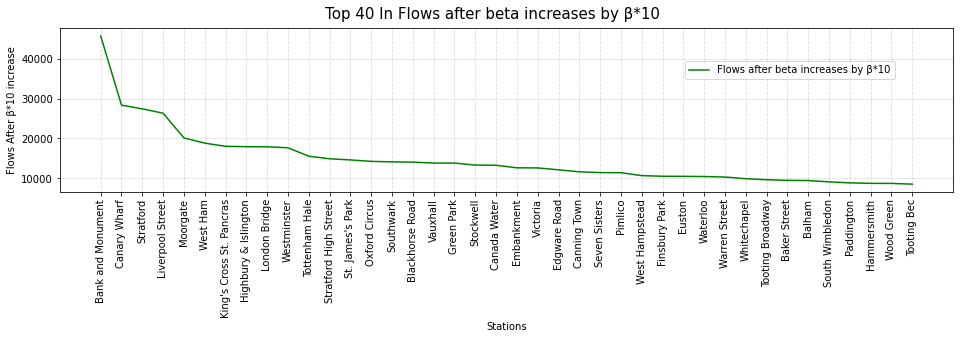

In [390]:
# plot top 40 after

fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Top 40 In Flows after beta increases by β*10", fontsize=15
)  # Decrease in Canary Wharf's jobs

ax.plot(
    list(diff_sb1["prodsimestsb1"])[0:],
    color="green",
    label="Flows after beta increases by β*10",
)

ax.grid(color="grey", linestyle="--", alpha=0.3)
ax.set_xlabel("Stations")
ax.set_ylabel("Flows After β*10 increase")
ax.set_xticks(list(range(40)))
ax.set_xticklabels(list(diff_sb1["station_destination"])[0:40], rotation=90)
ax.legend(bbox_to_anchor=(0.7, 0.8), loc="upper left", borderaxespad=0)
plt.show()

In [391]:
# plot for the Sb1
diff_sb1 = london_flows2.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimestsb1": "sum"}
)
diff_sb1["diff"] = diff_sb1["prodsimestsb1"] - diff_sb1["flows"]
# prodsimestsb2
diff_sb1["diff_abs"] = abs(diff_sb1["diff"])
diff_sb1.sort_values(by=["diff_abs"], ascending=False, inplace=True)
diff_sb1 = diff_sb1.head(40)
diff_sb1

station_destination  flows  prodsimestsb1     diff  diff_abs
212          Liverpool Street  61122        26317.0 -34805.0   34805.0
15          Bank and Monument  78549        45714.0 -32835.0   32835.0
54               Canary Wharf  58772        28340.0 -30432.0   30432.0
251             Oxford Circus  44368        14233.0 -30135.0   30135.0
326                 Stratford  55954        27409.0 -28545.0   28545.0
355                  Victoria  33251        12589.0 -20662.0   20662.0
119                Farringdon  25592         6301.0 -19291.0   19291.0
197  King's Cross St. Pancras  33330        18012.0 -15318.0   15318.0
170                   Holborn  22346         7427.0 -14919.0   14919.0
30                Bond Street  20967         6561.0 -14406.0   14406.0
327     Stratford High Street    788        14875.0  14087.0   14087.0
374                  West Ham   5487        18813.0  13326.0   13326.0
364                  Waterloo  23408        10428.0 -12980.0   12980.0
138                Green Park  26754        13803.0 -12951.0   12951.0
340            Tottenham Hale   3239        15536.0  12297.0   12297.0
339      Tottenham Court Road  19126         6921.0 -12205.0   12205.0
213             London Bridge  29926        17889.0 -12037.0   12037.0
63              Chancery Lane  15391         3431.0 -11960.0   11960.0
323                 Stockwell   1623        13304.0  11681.0   11681.0
252                Paddington  20193         8840.0 -11353.0   11353.0
28            Blackhorse Road   2955        14040.0  11085.0   11085.0
248                Old Street  15897         4874.0 -11023.0   11023.0
147               Hammersmith  18250         8713.0  -9537.0    9537.0
303          South Kensington  15325         6606.0  -8719.0    8719.0
317                St. Paul's  13446         5673.0  -7773.0    7773.0
386               Whitechapel  17633         9884.0  -7749.0    7749.0
308           South Wimbledon   1361         9096.0   7735.0    7735.0
167      Highbury & Islington  25385        17914.0  -7471.0    7471.0
337               Tooting Bec   1239         8519.0   7280.0    7280.0
53               Canada Water  20443        13253.0  -7190.0    7190.0
27                Blackfriars  10848         3732.0  -7116.0    7116.0
362             Warren Street  17309        10304.0  -7005.0    7005.0
391                Wood Green   2146         8700.0   6554.0    6554.0
390            Wimbledon Park    596         7116.0   6520.0    6520.0
98              Ealing Common    915         7265.0   6350.0    6350.0
116                    Euston  16800        10472.0  -6328.0    6328.0
258         Piccadilly Circus  13641         7635.0  -6006.0    6006.0
259                   Pimlico   5585        11393.0   5808.0    5808.0
129                Gidea Park    299         6024.0   5725.0    5725.0
14                     Balham   3814         9414.0   5600.0    5600.0

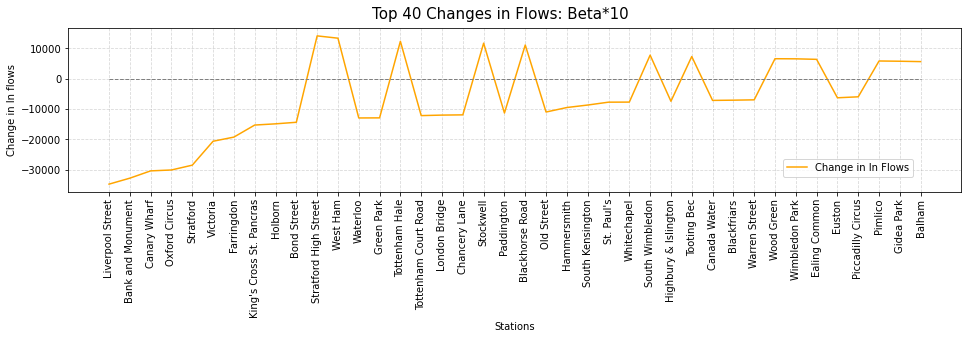

In [393]:
# plot for the SA
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Top 40 Changes in Flows: Beta*10", fontsize=15
)  # Decrease in Canary Wharf's jobs


ax.plot(list(diff_sb1["diff"])[0:], color="orange", label="Change in In Flows")
ax.plot([0] * 40, color="grey", linestyle="--", linewidth=1)

ax.grid(color="grey", linestyle="--", alpha=0.3)
ax.set_xlabel("Stations")
ax.set_ylabel("Change in In flows")

ax.set_xticks(list(range(40)))
ax.set_xticklabels(list(diff_sb1["station_destination"])[0:40], rotation=90)
ax.legend(bbox_to_anchor=(0.8, 0.2), loc="upper left", borderaxespad=0)

plt.show()

### Beta 2 plot

In [378]:
# plot for the Sb1
diff_sb2 = london_flows2.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimestsb2": "sum"}
)
diff_sb2["diff"] = diff_sb2["prodsimestsb2"] - diff_sb2["flows"]
# prodsimestsb2
diff_sb2["diff_abs"] = abs(diff_sb2["diff"])
diff_sb2.sort_values(by=["prodsimestsb2"], ascending=False, inplace=True)
diff_sb2 = diff_sb2.head(40)
diff_sb2

station_destination  flows  prodsimestsb2     diff  diff_abs
327        Stratford High Street    788        59285.0  58497.0   58497.0
315             St. James's Park  13339        38788.0  25449.0   25449.0
31                       Borough   3254        38164.0  34910.0   34910.0
227                     Moorgate  24574        36647.0  12073.0   12073.0
313                    Southwark  10326        33751.0  23425.0   23425.0
56                 Cannon Street   4698        28895.0  24197.0   24197.0
201                Lambeth North   1319        25563.0  24244.0   24244.0
12                       Arsenal    315        24691.0  24376.0   24376.0
323                    Stockwell   1623        23418.0  21795.0   21795.0
107                 Edgware Road   6868        23313.0  16445.0   16445.0
49   Caledonian Road & Barnsbury   1668        22670.0  21002.0   21002.0
116                       Euston  16800        21318.0   4518.0    4518.0
281                  Rotherhithe    321        20292.0  19971.0   19971.0
340               Tottenham Hale   3239        19771.0  16532.0   16532.0
321                    Star Lane   1052        18724.0  17672.0   17672.0
337                  Tooting Bec   1239        18348.0  17109.0   17109.0
362                Warren Street  17309        17762.0    453.0     453.0
314              St James Street    184        17410.0  17226.0   17226.0
259                      Pimlico   5585        16219.0  10634.0   10634.0
74                 Clapham North   1238        15444.0  14206.0   14206.0
98                 Ealing Common    915        14109.0  13194.0   13194.0
163                  Heron Quays   5975        13202.0   7227.0    7227.0
308              South Wimbledon   1361        13029.0  11668.0   11668.0
390               Wimbledon Park    596        12104.0  11508.0   11508.0
112                   Embankment  10220        11632.0   1412.0    1412.0
14                        Balham   3814        11016.0   7202.0    7202.0
4                   Aldgate East   7932        10320.0   2388.0    2388.0
54                  Canary Wharf  58772        10207.0 -48565.0   48565.0
53                  Canada Water  20443        10047.0 -10396.0   10396.0
290                Seven Sisters  10191         9826.0   -365.0     365.0
223                   Marylebone   4250         9581.0   5331.0    5331.0
196                King George V    800         9540.0   8740.0    8740.0
171                 Holland Park   2063         9532.0   7469.0    7469.0
371                West Brompton   5859         9375.0   3516.0    3516.0
35                      Bow Road   1193         9364.0   8171.0    8171.0
331                 Surrey Quays   1005         9294.0   8289.0    8289.0
373                West Finchley     91         9017.0   8926.0    8926.0
111                Elverson Road    226         8880.0   8654.0    8654.0
36                   Brent Cross    450         8851.0   8401.0    8401.0
45                     Burnt Oak    649         8794.0   8145.0    8145.0

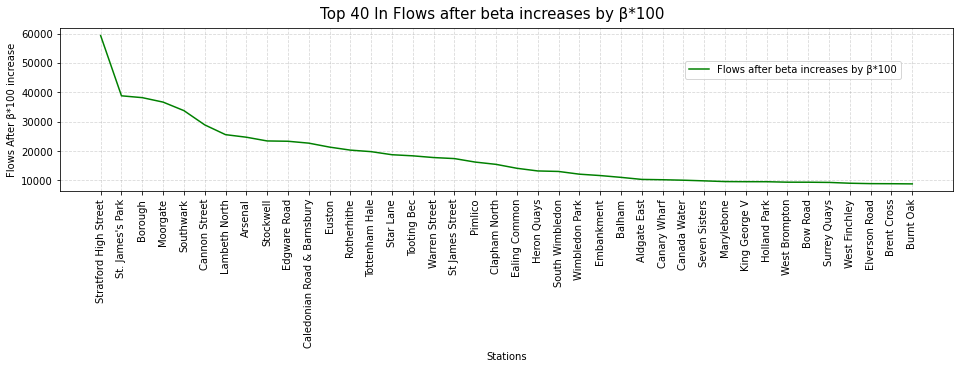

In [379]:
# plot top 40 after

fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Top 40 In Flows after beta increases by β*100", fontsize=15
)  # Decrease in Canary Wharf's jobs

ax.plot(
    list(diff_sb2["prodsimestsb2"])[0:],
    color="green",
    label="Flows after beta increases by β*100",
)

ax.grid(color="grey", linestyle="--", alpha=0.3)
ax.set_xlabel("Stations")
ax.set_ylabel("Flows After β*100 increase")
ax.set_xticks(list(range(40)))
ax.set_xticklabels(list(diff_sb2["station_destination"])[0:40], rotation=90)
ax.legend(bbox_to_anchor=(0.7, 0.8), loc="upper left", borderaxespad=0)
plt.show()

In [366]:
# plot for the Sb1
diff_sb2 = london_flows2.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimestsb2": "sum"}
)
diff_sb2["diff"] = diff_sb2["prodsimestsb2"] - diff_sb2["flows"]
# prodsimestsb2
diff_sb2["diff_abs"] = abs(diff_sb2["diff"])
diff_sb2.sort_values(by=["diff_abs"], ascending=False, inplace=True)
diff_sb2 = diff_sb2.head(40)
diff_sb2

station_destination  flows  prodsimestsb2     diff  diff_abs
15             Bank and Monument  78549         5671.0 -72878.0   72878.0
327        Stratford High Street    788        59285.0  58497.0   58497.0
212             Liverpool Street  61122         6694.0 -54428.0   54428.0
326                    Stratford  55954         4343.0 -51611.0   51611.0
54                  Canary Wharf  58772        10207.0 -48565.0   48565.0
251                Oxford Circus  44368         2178.0 -42190.0   42190.0
31                       Borough   3254        38164.0  34910.0   34910.0
355                     Victoria  33251         3426.0 -29825.0   29825.0
197     King's Cross St. Pancras  33330         4583.0 -28747.0   28747.0
213                London Bridge  29926         1385.0 -28541.0   28541.0
138                   Green Park  26754          124.0 -26630.0   26630.0
315             St. James's Park  13339        38788.0  25449.0   25449.0
119                   Farringdon  25592         1212.0 -24380.0   24380.0
12                       Arsenal    315        24691.0  24376.0   24376.0
201                Lambeth North   1319        25563.0  24244.0   24244.0
56                 Cannon Street   4698        28895.0  24197.0   24197.0
313                    Southwark  10326        33751.0  23425.0   23425.0
167         Highbury & Islington  25385         2935.0 -22450.0   22450.0
323                    Stockwell   1623        23418.0  21795.0   21795.0
49   Caledonian Road & Barnsbury   1668        22670.0  21002.0   21002.0
281                  Rotherhithe    321        20292.0  19971.0   19971.0
170                      Holborn  22346         2619.0 -19727.0   19727.0
339         Tottenham Court Road  19126          154.0 -18972.0   18972.0
321                    Star Lane   1052        18724.0  17672.0   17672.0
364                     Waterloo  23408         6028.0 -17380.0   17380.0
314              St James Street    184        17410.0  17226.0   17226.0
252                   Paddington  20193         3003.0 -17190.0   17190.0
147                  Hammersmith  18250         1101.0 -17149.0   17149.0
337                  Tooting Bec   1239        18348.0  17109.0   17109.0
340               Tottenham Hale   3239        19771.0  16532.0   16532.0
107                 Edgware Road   6868        23313.0  16445.0   16445.0
30                   Bond Street  20967         4571.0 -16396.0   16396.0
248                   Old Street  15897           16.0 -15881.0   15881.0
74                 Clapham North   1238        15444.0  14206.0   14206.0
63                 Chancery Lane  15391         1365.0 -14026.0   14026.0
386                  Whitechapel  17633         3691.0 -13942.0   13942.0
317                   St. Paul's  13446           22.0 -13424.0   13424.0
98                 Ealing Common    915        14109.0  13194.0   13194.0
354                     Vauxhall  16242         3931.0 -12311.0   12311.0
227                     Moorgate  24574        36647.0  12073.0   12073.0

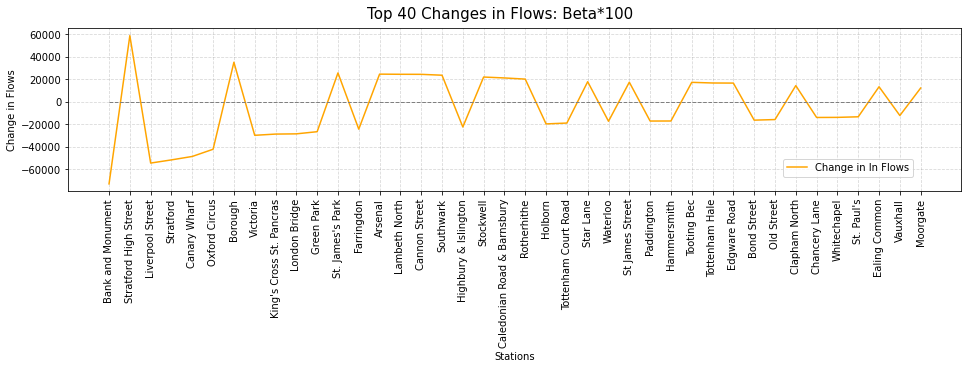

In [351]:

# plot for the SA
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle("Top 40 Changes in Flows: Beta*100", fontsize=15)


ax.plot(list(diff_sb2["diff"])[0:], color="orange", label="Change in In Flows")
ax.plot([0] * 40, color="grey", linestyle="--", linewidth=1)

ax.grid(color="grey", linestyle="--", alpha=0.3)
ax.set_xlabel("Stations")
ax.set_ylabel("Change in Flows")

ax.set_xticks(list(range(40)))
ax.set_xticklabels(list(diff_sb2["station_destination"])[0:40], rotation=90)
ax.legend(bbox_to_anchor=(0.8, 0.2), loc="upper left", borderaxespad=0)
plt.show()